# Introduction
this project is ANN model for battery state estimation with NASA data as it is a sub-project in the electric vehicle architecture and digital twin project.

In [8]:
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

## NASA data analysis

In [51]:
mat_b5 = loadmat('nasa_data/B0005.mat')
mat_b6 = loadmat('nasa_data/B0006.mat')
mat_b7 = loadmat('nasa_data/B0007.mat')
mat_b18 = loadmat('nasa_data/B0018.mat')
print('dataset5', len(mat_b5['B0005'][0, 0]['cycle'][0]), 
      'dataset6', len(mat_b6['B0006'][0, 0]['cycle'][0]),
     'dataset7', len(mat_b7['B0007'][0, 0]['cycle'][0]),
     'dataset18', len(mat_b18['B0018'][0, 0]['cycle'][0]))

dataset5 616 dataset6 616 dataset7 616 dataset18 319


**battery data structure**
![battery data structure](img/img1.png) 
**charge  data structure**
![charge data structure](img/charge_data.png) 
**discharge data structure**
![discharge data structure](img/discharge_data.png) 

In [52]:
charge = mat_b5['B0005'][0, 0]['cycle'][0,0]
charge

(array(['charge'], dtype='<U6'), array([[24]], dtype=uint8), array([[2.0080e+03, 4.0000e+00, 2.0000e+00, 1.3000e+01, 8.0000e+00,
        1.7921e+01]]), array([[(array([[3.87301722, 3.47939356, 4.00058782, 4.01239519, 4.01970806,
                4.02540947, 4.03063627, 4.03534896, 4.03971637, 4.04354121,
                4.04672407, 4.05032083, 4.05347776, 4.05687947, 4.06020401,
                4.06309148, 4.06606364, 4.06810568, 4.07091089, 4.07314062,
                4.07531198, 4.07798651, 4.07976022, 4.08180212, 4.08379322,
                4.08535888, 4.08707793, 4.0888699 , 4.08991841, 4.09204117,
                4.09327341, 4.09462341, 4.09636787, 4.09755211, 4.09852259,
                4.09990153, 4.10107397, 4.10186053, 4.10303834, 4.10433761,
                4.10518719, 4.10617751, 4.10713402, 4.108074  , 4.10876115,
                4.10971157, 4.11073785, 4.1115377 , 4.11216994, 4.11307997,
                4.11363282, 4.114555  , 4.11540239, 4.115793  , 4.11674636,
           

In [53]:
charge['data']

array([[(array([[3.87301722, 3.47939356, 4.00058782, 4.01239519, 4.01970806,
                4.02540947, 4.03063627, 4.03534896, 4.03971637, 4.04354121,
                4.04672407, 4.05032083, 4.05347776, 4.05687947, 4.06020401,
                4.06309148, 4.06606364, 4.06810568, 4.07091089, 4.07314062,
                4.07531198, 4.07798651, 4.07976022, 4.08180212, 4.08379322,
                4.08535888, 4.08707793, 4.0888699 , 4.08991841, 4.09204117,
                4.09327341, 4.09462341, 4.09636787, 4.09755211, 4.09852259,
                4.09990153, 4.10107397, 4.10186053, 4.10303834, 4.10433761,
                4.10518719, 4.10617751, 4.10713402, 4.108074  , 4.10876115,
                4.10971157, 4.11073785, 4.1115377 , 4.11216994, 4.11307997,
                4.11363282, 4.114555  , 4.11540239, 4.115793  , 4.11674636,
                4.117245  , 4.11794271, 4.1186426 , 4.11943651, 4.12004755,
                4.12062053, 4.12120233, 4.12214376, 4.12223722, 4.12330381,
           

In [54]:
discharge = mat_b5['B0005'][0, 0]['cycle'][0,1]
discharge

(array(['discharge'], dtype='<U9'), array([[24]], dtype=uint8), array([[2.0080e+03, 4.0000e+00, 2.0000e+00, 1.5000e+01, 2.5000e+01,
        4.1593e+01]]), array([[(array([[4.19149181, 4.19074907, 3.97487091, 3.95171671, 3.93435249,
                3.92005844, 3.90790351, 3.89703572, 3.88747658, 3.87895859,
                3.87101598, 3.86347968, 3.85666051, 3.85001358, 3.84384191,
                3.83768798, 3.83193825, 3.82641444, 3.82109573, 3.81589666,
                3.81069682, 3.80583738, 3.80112163, 3.79629313, 3.79144891,
                3.78662469, 3.78206292, 3.7771754 , 3.77240629, 3.76793746,
                3.7632293 , 3.75851149, 3.75421321, 3.7496292 , 3.74516886,
                3.74100501, 3.73669983, 3.73248271, 3.72835255, 3.72453324,
                3.72065103, 3.71640901, 3.71279184, 3.70842761, 3.70479177,
                3.70068258, 3.69675771, 3.69303933, 3.6891768 , 3.68521448,
                3.68149374, 3.67779221, 3.67406181, 3.67030176, 3.66673391,
        

**capacity exists in discharge**

In [55]:
discharge['data'][0][0]['Capacity']

array([[1.85648742]])

In [56]:
discharge['data'][0][0]['Voltage_measured']

array([[4.19149181, 4.19074907, 3.97487091, 3.95171671, 3.93435249,
        3.92005844, 3.90790351, 3.89703572, 3.88747658, 3.87895859,
        3.87101598, 3.86347968, 3.85666051, 3.85001358, 3.84384191,
        3.83768798, 3.83193825, 3.82641444, 3.82109573, 3.81589666,
        3.81069682, 3.80583738, 3.80112163, 3.79629313, 3.79144891,
        3.78662469, 3.78206292, 3.7771754 , 3.77240629, 3.76793746,
        3.7632293 , 3.75851149, 3.75421321, 3.7496292 , 3.74516886,
        3.74100501, 3.73669983, 3.73248271, 3.72835255, 3.72453324,
        3.72065103, 3.71640901, 3.71279184, 3.70842761, 3.70479177,
        3.70068258, 3.69675771, 3.69303933, 3.6891768 , 3.68521448,
        3.68149374, 3.67779221, 3.67406181, 3.67030176, 3.66673391,
        3.66299805, 3.65966439, 3.65589414, 3.65232651, 3.64876348,
        3.64554686, 3.64207625, 3.63846406, 3.63507607, 3.63166482,
        3.62857854, 3.6250126 , 3.62158223, 3.61846125, 3.61506725,
        3.61188181, 3.60857868, 3.60553494, 3.60

In [57]:
print('discharge', discharge['data'][0][0]['Capacity'], 
      '\nvoltage', discharge['data'][0][0]['Voltage_measured'],
     '\ncurrent', discharge['data'][0][0]['Current_measured'],
     '\ntemperature', discharge['data'][0][0]['Temperature_measured'],
     '\ncurrent_load', discharge['data'][0][0]['Current_load'],
     '\nvoltage_load', discharge['data'][0][0]['Voltage_load'],
     '\time', discharge['data'][0][0]['Time'])


discharge [[1.85648742]] 
voltage [[4.19149181 4.19074907 3.97487091 3.95171671 3.93435249 3.92005844
  3.90790351 3.89703572 3.88747658 3.87895859 3.87101598 3.86347968
  3.85666051 3.85001358 3.84384191 3.83768798 3.83193825 3.82641444
  3.82109573 3.81589666 3.81069682 3.80583738 3.80112163 3.79629313
  3.79144891 3.78662469 3.78206292 3.7771754  3.77240629 3.76793746
  3.7632293  3.75851149 3.75421321 3.7496292  3.74516886 3.74100501
  3.73669983 3.73248271 3.72835255 3.72453324 3.72065103 3.71640901
  3.71279184 3.70842761 3.70479177 3.70068258 3.69675771 3.69303933
  3.6891768  3.68521448 3.68149374 3.67779221 3.67406181 3.67030176
  3.66673391 3.66299805 3.65966439 3.65589414 3.65232651 3.64876348
  3.64554686 3.64207625 3.63846406 3.63507607 3.63166482 3.62857854
  3.6250126  3.62158223 3.61846125 3.61506725 3.61188181 3.60857868
  3.60553494 3.6021859  3.59885715 3.59576709 3.59301666 3.58971009
  3.5866522  3.58344204 3.58048534 3.57725048 3.57436883 3.57128513
  3.56872067 3

Coulomb calculation </br>
Coulomb = ((current_now + current_previous)/2)/(time_now - time_previous) </br>
(current_now + current_previous)/2 is because measurement time inverval is long in data. so i want to make them smooth. </br>
data is measured with constant current. so it is not necessary to use many history data.

In [58]:
coulomb = ((discharge['data'][0][0]['Current_measured'][0][0]+discharge['data'][0][0]['Current_measured'][0][1])/2)/(discharge['data'][0][0]['Time'][0][1]-discharge['data'][0][0]['Time'][0][0])
coulomb

-0.00019008386744250041

In [ ]:
b5_plot_df = b5_capacity.loc[(b5_capacity['cycle']>=1),['cycle','capacity']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(b5_plot_df['cycle'], b5_plot_df['capacity'])
plt.plot(b6_plot_df['cycle'], b6_plot_df['capacity'])
plt.plot(b7_plot_df['cycle'], b7_plot_df['capacity'])
plt.plot(b18_plot_df['cycle'], b18_plot_df['capacity'])
#Draw threshold
plt.plot([0.,len(b5_capacity)], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(epoch_list, loss_list)

Check one discharge cycle data

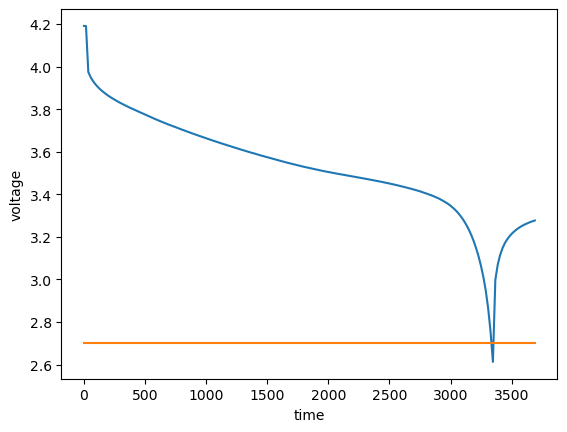

In [82]:
plt.xlabel("time")
plt.ylabel("voltage")
plt.plot(discharge['data'][0][0]['Time'][0], discharge['data'][0][0]['Voltage_measured'][0])
time_len = len(discharge['data'][0][0]['Time'][0])
plt.plot([0,discharge['data'][0][0]['Time'][0][time_len-1]], [2.7,2.7])


In [133]:
b5_cycle_arr = []
b5_cycle_arr = mat_b5['B0005'][0, 0]['cycle'][0,]
len(b5_cycle_arr)

616

In [134]:
print(b5_cycle_arr[0]['type'], cycle_arr[1]['type'])

['charge'] ['discharge']


In [135]:
b5_cycle_arr[0]['data'][0][0]['Voltage_measured'][0]

array([3.87301722, 3.47939356, 4.00058782, 4.01239519, 4.01970806,
       4.02540947, 4.03063627, 4.03534896, 4.03971637, 4.04354121,
       4.04672407, 4.05032083, 4.05347776, 4.05687947, 4.06020401,
       4.06309148, 4.06606364, 4.06810568, 4.07091089, 4.07314062,
       4.07531198, 4.07798651, 4.07976022, 4.08180212, 4.08379322,
       4.08535888, 4.08707793, 4.0888699 , 4.08991841, 4.09204117,
       4.09327341, 4.09462341, 4.09636787, 4.09755211, 4.09852259,
       4.09990153, 4.10107397, 4.10186053, 4.10303834, 4.10433761,
       4.10518719, 4.10617751, 4.10713402, 4.108074  , 4.10876115,
       4.10971157, 4.11073785, 4.1115377 , 4.11216994, 4.11307997,
       4.11363282, 4.114555  , 4.11540239, 4.115793  , 4.11674636,
       4.117245  , 4.11794271, 4.1186426 , 4.11943651, 4.12004755,
       4.12062053, 4.12120233, 4.12214376, 4.12223722, 4.12330381,
       4.12376399, 4.12442084, 4.12507381, 4.12567826, 4.12616805,
       4.12656627, 4.12731238, 4.12808141, 4.12845744, 4.12895

In [136]:
b5_cycle_arr[1]['data'][0][0]['Voltage_measured'][0]

array([4.19149181, 4.19074907, 3.97487091, 3.95171671, 3.93435249,
       3.92005844, 3.90790351, 3.89703572, 3.88747658, 3.87895859,
       3.87101598, 3.86347968, 3.85666051, 3.85001358, 3.84384191,
       3.83768798, 3.83193825, 3.82641444, 3.82109573, 3.81589666,
       3.81069682, 3.80583738, 3.80112163, 3.79629313, 3.79144891,
       3.78662469, 3.78206292, 3.7771754 , 3.77240629, 3.76793746,
       3.7632293 , 3.75851149, 3.75421321, 3.7496292 , 3.74516886,
       3.74100501, 3.73669983, 3.73248271, 3.72835255, 3.72453324,
       3.72065103, 3.71640901, 3.71279184, 3.70842761, 3.70479177,
       3.70068258, 3.69675771, 3.69303933, 3.6891768 , 3.68521448,
       3.68149374, 3.67779221, 3.67406181, 3.67030176, 3.66673391,
       3.66299805, 3.65966439, 3.65589414, 3.65232651, 3.64876348,
       3.64554686, 3.64207625, 3.63846406, 3.63507607, 3.63166482,
       3.62857854, 3.6250126 , 3.62158223, 3.61846125, 3.61506725,
       3.61188181, 3.60857868, 3.60553494, 3.6021859 , 3.59885

useless double array make complex </br>
**check voltage during discarge**

Text(0.5, 1.0, 'Discharge Voltage')

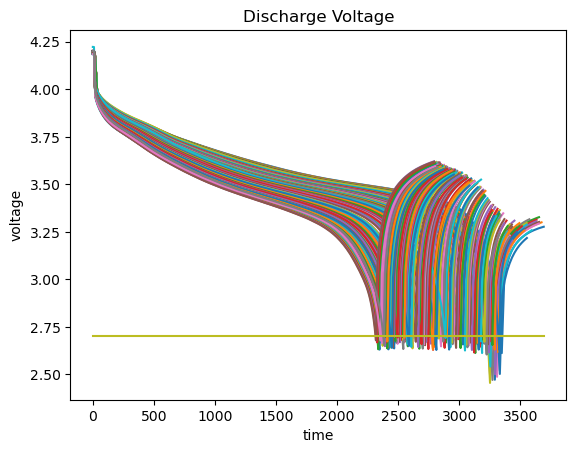

In [137]:
plt.xlabel("time")
plt.ylabel("voltage")

for i in range(len(cycle_arr)-1):
    if(b5_cycle_arr[i]['type'] == 'discharge'):
        plt.plot(b5_cycle_arr[i]['data'][0][0]['Time'][0], b5_cycle_arr[i]['data'][0][0]['Voltage_measured'][0])
        
time_len = len(b5_cycle_arr[1]['data'][0][0]['Time'][0])
plt.plot([0,b5_cycle_arr[1]['data'][0][0]['Time'][0][time_len-1]], [2.7,2.7])

plt.title('Discharge Voltage')

it looks data no problem </br>
**check voltage during charge**

Text(0.5, 1.0, 'Charge Voltage')

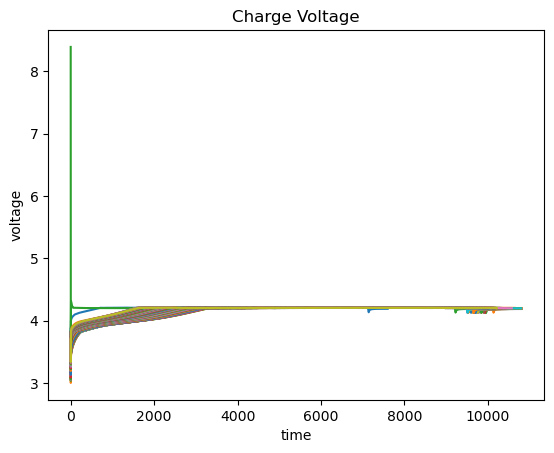

In [138]:
plt.xlabel("time")
plt.ylabel("voltage")

for i in range(len(cycle_arr)-1):
    if(b5_cycle_arr[i]['type'] == 'charge'):
        plt.plot(b5_cycle_arr[i]['data'][0][0]['Time'][0], b5_cycle_arr[i]['data'][0][0]['Voltage_measured'][0])

plt.title('Charge Voltage')

it looks strange
check them again in time scale up

Text(0.5, 1.0, 'Charge Voltage')

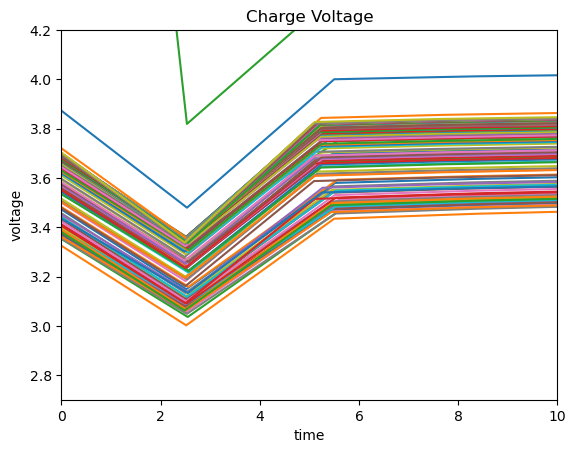

In [139]:
plt.xlabel("time")
plt.ylabel("voltage")

for i in range(len(b5_cycle_arr)-1):
    if(b5_cycle_arr[i]['type'] == 'charge'):
        plt.plot(b5_cycle_arr[i]['data'][0][0]['Time'][0], b5_cycle_arr[i]['data'][0][0]['Voltage_measured'][0])
plt.xlim(0, 10)
plt.ylim(2.7, 4.2)
plt.title('Charge Voltage')

Text(0.5, 1.0, 'Charge Voltage')

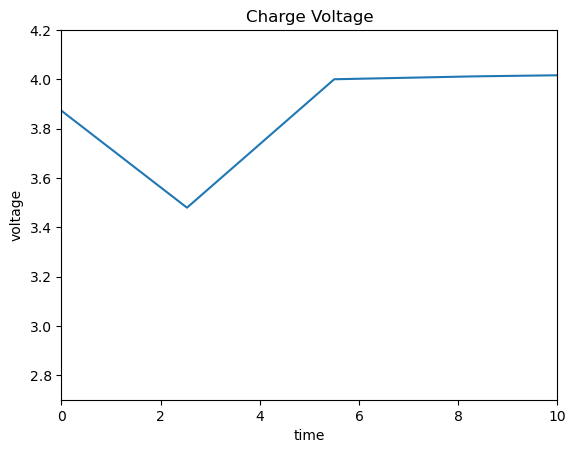

In [140]:
plt.xlabel("time")
plt.ylabel("voltage")


plt.plot(b5_cycle_arr[0]['data'][0][0]['Time'][0], b5_cycle_arr[0]['data'][0][0]['Voltage_measured'][0])
plt.xlim(0, 10)
plt.ylim(2.7, 4.2)
plt.title('Charge Voltage')

as shown voltage data during charging, I guess there was some experimental problems </br>
So, i cannot use the data during charging cycle

## Reshape discharge data

In [312]:
coulomb = ((discharge['data'][0][0]['Current_measured'][0][0]+discharge['data'][0][0]['Current_measured'][0][1])/2)*(discharge['data'][0][0]['Time'][0][1]-discharge['data'][0][0]['Time'][0][0])/3600
coulomb

-1.486888606285338e-05

In [ ]:
discharge_arr[cycle_counter]['Voltage_measured'] = cycle_arr[i]['data'][0][0]['Current_measured'][0]
            temperature = cycle_arr[i]['data'][0][0]['Temperature_measured'][0]
            current_load = cycle_arr[i]['data'][0][0]['Current_load'][0]
            voltage_load = cycle_arr[i]['data'][0][0]['Voltage_load'][0]
            time = voltage_load = cycle_arr[i]['data'][0][0]['Time'][0]

In [162]:
cycle_arr[0]['data'][0][0]['Voltage_measured'][0]

array([3.87301722, 3.47939356, 4.00058782, 4.01239519, 4.01970806,
       4.02540947, 4.03063627, 4.03534896, 4.03971637, 4.04354121,
       4.04672407, 4.05032083, 4.05347776, 4.05687947, 4.06020401,
       4.06309148, 4.06606364, 4.06810568, 4.07091089, 4.07314062,
       4.07531198, 4.07798651, 4.07976022, 4.08180212, 4.08379322,
       4.08535888, 4.08707793, 4.0888699 , 4.08991841, 4.09204117,
       4.09327341, 4.09462341, 4.09636787, 4.09755211, 4.09852259,
       4.09990153, 4.10107397, 4.10186053, 4.10303834, 4.10433761,
       4.10518719, 4.10617751, 4.10713402, 4.108074  , 4.10876115,
       4.10971157, 4.11073785, 4.1115377 , 4.11216994, 4.11307997,
       4.11363282, 4.114555  , 4.11540239, 4.115793  , 4.11674636,
       4.117245  , 4.11794271, 4.1186426 , 4.11943651, 4.12004755,
       4.12062053, 4.12120233, 4.12214376, 4.12223722, 4.12330381,
       4.12376399, 4.12442084, 4.12507381, 4.12567826, 4.12616805,
       4.12656627, 4.12731238, 4.12808141, 4.12845744, 4.12895

In [206]:
discharge_arr = []
voltage = []
data_ = []
voltage = cycle_arr[0]['data'][0][0]['Voltage_measured'][0]
current = cycle_arr[0]['data'][0][0]['Current_measured'][0]
data_ = cycle_arr[0]['data'][0][0]
count = 1

discharge_arr.append([count, data_])

#discharge_arr[0][1]
discharge_arr[0]

[1,
 (array([[3.87301722, 3.47939356, 4.00058782, 4.01239519, 4.01970806,
         4.02540947, 4.03063627, 4.03534896, 4.03971637, 4.04354121,
         4.04672407, 4.05032083, 4.05347776, 4.05687947, 4.06020401,
         4.06309148, 4.06606364, 4.06810568, 4.07091089, 4.07314062,
         4.07531198, 4.07798651, 4.07976022, 4.08180212, 4.08379322,
         4.08535888, 4.08707793, 4.0888699 , 4.08991841, 4.09204117,
         4.09327341, 4.09462341, 4.09636787, 4.09755211, 4.09852259,
         4.09990153, 4.10107397, 4.10186053, 4.10303834, 4.10433761,
         4.10518719, 4.10617751, 4.10713402, 4.108074  , 4.10876115,
         4.10971157, 4.11073785, 4.1115377 , 4.11216994, 4.11307997,
         4.11363282, 4.114555  , 4.11540239, 4.115793  , 4.11674636,
         4.117245  , 4.11794271, 4.1186426 , 4.11943651, 4.12004755,
         4.12062053, 4.12120233, 4.12214376, 4.12223722, 4.12330381,
         4.12376399, 4.12442084, 4.12507381, 4.12567826, 4.12616805,
         4.12656627, 4.127312

In [600]:
def reshape_discharge_data(cycle_arr, term_voltage):
    discharge_arr = []
    voltage = []
    current = []
    temperature = []
    current_load = []
    voltage_load = []
    time = []
    counter = 0
    
    for i in range(len(cycle_arr)-1):
        if(cycle_arr[i]['type'] == 'discharge'):
            voltage = cycle_arr[i]['data'][0][0]['Voltage_measured'][0]
            current = cycle_arr[i]['data'][0][0]['Current_measured'][0]
            temperature = cycle_arr[i]['data'][0][0]['Temperature_measured'][0]
            current_load = cycle_arr[i]['data'][0][0]['Current_load'][0]
            voltage_load = cycle_arr[i]['data'][0][0]['Voltage_load'][0]
            time = cycle_arr[i]['data'][0][0]['Time'][0]
            capacity = cycle_arr[i]['data'][0][0]['Capacity'][0][0]
            
            counter = counter + 1
            coulomb = []
            acc_capacity_list = []
            acc_capacity = 0.0
            coulomb.append(0.0)
            acc_capacity_list.append(0.0)
            coulomb_capacity = 0.0
            acc_flag = 1 # after discharging stop, prevent increasing capacity from voltage jump
            print(len(time))
            for j in range(1, len(time)):
                coulomb.append((((current[j]+current[j-1])/2)*(time[j]-time[j-1]))/3600.0)
                acc_capacity = acc_capacity + coulomb[j]
                acc_capacity_list.append(acc_capacity)
                if voltage[j] < term_voltage and acc_flag: #record and prevent re-recording from voltage jump when stopping discharge.
                    coulomb_capacity = acc_capacity
                    #print(voltage[j], current[j], (current[j]+current[j-1])/2, coulomb[j], coulomb_capacity)
                    acc_flag = 0
            discharge_arr.append([counter, capacity, coulomb_capacity, 
                                  voltage, current, temperature, coulomb, current_load, voltage_load, time, acc_capacity_list])

            
    return discharge_arr

# It looks like experiment is not managed well
# data sizes are jumped at some cycle points

197
196
195
194
194
195
195
191
190
190
189
187
186
186
185
184
183
182
182
192
190
189
187
188
184
184
183
183
183
182
371
365
363
362
360
360
359
357
356
355
355
354
179
354
352
350
349
356
356
353
351
350
349
349
348
347
346
346
345
345
343
343
342
341
341
340
339
338
338
337
336
336
335
334
333
333
333
333
331
330
330
330
329
329
327
326
326
326
325
339
329
328
327
326
325
324
324
323
322
322
321
320
321
322
320
319
316
318
317
317
316
315
315
315
314
313
312
312
312
314
315
313
312
311
311
309
309
309
308
307
307
307
308
309
308
307
306
306
306
305
304
304
304
303
303
302
302
302
301
302
305
303
302
302
301
301
300
300
299
299
298
298
298
297
297
297
298
300


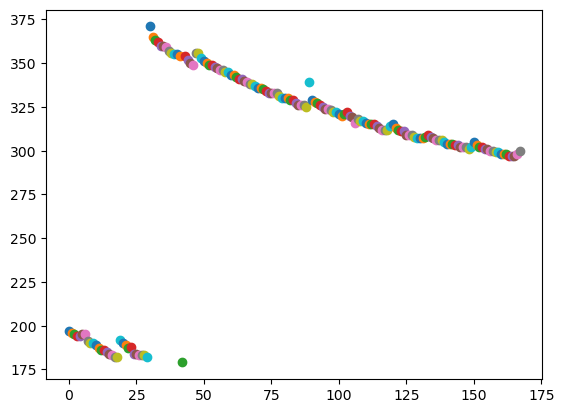

In [604]:
b5_discharge = []
b5_discharge = reshape_discharge_data(b5_cycle_arr, 2.7)
for i in range(len(b5_discharge)):
    plt.plot(i, len(b5_discharge[i][9]), 'o')

# Compare coulomb values with current values

In [607]:
print(len(b5_discharge[100][4]), len(b5_discharge[100][6]))
for i in range(len(b5_discharge[100][4]) - 1):
    print(b5_discharge[100][4][i], b5_discharge[100][6][i], b5_discharge[100][10][i])

321 321
0.0011188537018346392 0.0 0.0
-0.0001888295112962986 1.2089022776733782e-06 1.2089022776733782e-06
-2.011843617689111 -0.002842554729572576 -0.0028413458272949026
-2.0138481609468086 -0.005276451849303773 -0.008117797676598676
-2.0107848493868583 -0.005258294823362337 -0.013376092499961013
-2.012690451978615 -0.005203694723099344 -0.018579787223060355
-2.0116797698914 -0.005213795198556043 -0.0237935824216164
-2.0106597720597765 -0.005211164339905629 -0.029004746761522027
-2.0109471189729637 -0.005245404210234512 -0.034250150971756536
-2.0114830764869844 -0.00522860058323745 -0.03947875155499399
-2.012890463185835 -0.00524006971311565 -0.04471882126810964
-2.010501090100254 -0.005230409019271924 -0.04994923028738156
-2.012790422383167 -0.005229720175740599 -0.055178950463122156
-2.0119693939463934 -0.005232187761228428 -0.06041113822435058
-2.0113894202229234 -0.005212484863690472 -0.06562362308804105
-2.010803054908374 -0.0052456093529837265 -0.07086923244102478
-2.01112223892

# Verify NASA dataset with accumulated capacity

In [610]:
for i in range(len(b5_discharge)-1):
    plt.plot(b5_discharge[i][9], b5_discharge[i][10])

# Compare original capacity in NASA dataset with calculated capacity with coulomb
orginal capacity was strange due to capacity jump during aging cycle</br>
so i calculate capacity with coulomb accumulation, but they are the same. </br>
it looks like some problems in data.</br>
How do researchers study estimation algorithms with this data?

In [617]:
for i in range(len(b5_discharge)-1):
    plt.subplot(1,2,1)
    plt.plot(b5_discharge[i][0], b5_discharge[i][1], 'bo')
    plt.subplot(1,2,2)
    plt.plot(b5_discharge[i][0], -b5_discharge[i][2], 'ro')


In [614]:
for i in range(len(b5_discharge)-1):
    print(len(b5_discharge[i][3]), 
          len(b5_discharge[i][4]), 
          len(b5_discharge[i][6]),
          len(b5_discharge[i][7]),
         len(b5_discharge[i][8]),
         len(b5_discharge[i][9]))

197 197 197 197 197 197
196 196 196 196 196 196
195 195 195 195 195 195
194 194 194 194 194 194
194 194 194 194 194 194
195 195 195 195 195 195
195 195 195 195 195 195
191 191 191 191 191 191
190 190 190 190 190 190
190 190 190 190 190 190
189 189 189 189 189 189
187 187 187 187 187 187
186 186 186 186 186 186
186 186 186 186 186 186
185 185 185 185 185 185
184 184 184 184 184 184
183 183 183 183 183 183
182 182 182 182 182 182
182 182 182 182 182 182
192 192 192 192 192 192
190 190 190 190 190 190
189 189 189 189 189 189
187 187 187 187 187 187
188 188 188 188 188 188
184 184 184 184 184 184
184 184 184 184 184 184
183 183 183 183 183 183
183 183 183 183 183 183
183 183 183 183 183 183
182 182 182 182 182 182
371 371 371 371 371 371
365 365 365 365 365 365
363 363 363 363 363 363
362 362 362 362 362 362
360 360 360 360 360 360
360 360 360 360 360 360
359 359 359 359 359 359
357 357 357 357 357 357
356 356 356 356 356 356
355 355 355 355 355 355
355 355 355 355 355 355
354 354 354 354 

orginal capaacity was strange </br>
so i calculate capacity with coulomb accumulation, but they are the same. </br>
it looks like some problems in data.</br>
How do researchers study estimation algorithms with this data?

In [522]:
b6_cycle_arr = []
b6_cycle_arr = mat_b6['B0006'][0, 0]['cycle'][0,]
b6_discharge = []
b6_discharge = reshape_discharge_data(b6_cycle_arr, 2.7)
#print(b5_discharge[1][6])
#plt.plot(b5_discharge[0][9], b5_discharge[0][3])
#plt.plot(b5_discharge[0][9], b5_discharge[0][4])
for i in range(len(b6_discharge)-1):
    plt.subplot(1,2,1)
    plt.plot([b6_discharge[i][0]], [b6_discharge[i][1]], 'bo')
    plt.subplot(1,2,2)
    plt.plot([b6_discharge[i][0]], [-b6_discharge[i][2]], 'ro')

B0006 is also strange

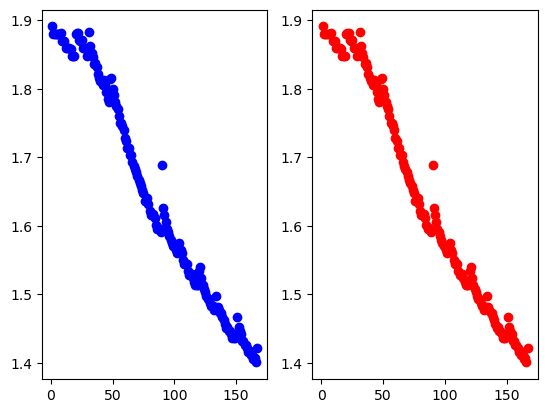

In [523]:
b7_cycle_arr = []
b7_cycle_arr = mat_b7['B0007'][0, 0]['cycle'][0,]
b7_discharge = []
b7_discharge = reshape_discharge_data(b7_cycle_arr, 2.7)
#print(b5_discharge[1][6])
#plt.plot(b5_discharge[0][9], b5_discharge[0][3])
#plt.plot(b5_discharge[0][9], b5_discharge[0][4])
for i in range(len(b7_discharge)-1):
    plt.subplot(1,2,1)
    plt.plot([b7_discharge[i][0]], [b7_discharge[i][1]], 'bo')
    plt.subplot(1,2,2)
    plt.plot([b7_discharge[i][0]], [-b7_discharge[i][2]], 'ro')

B0007 is also strange

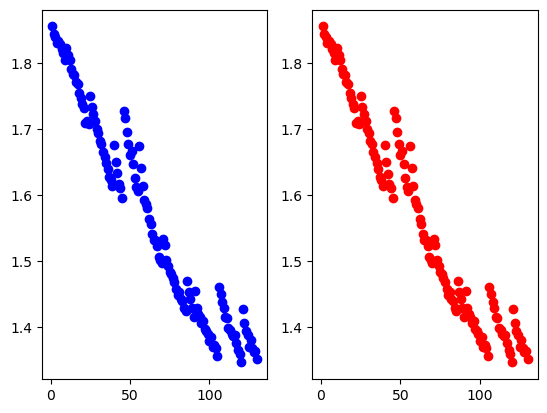

In [524]:
b18_cycle_arr = []
b18_cycle_arr = mat_b18['B0018'][0, 0]['cycle'][0,]
b18_discharge = []
b18_discharge = reshape_discharge_data(b18_cycle_arr, 2.7)
#print(b5_discharge[1][6])
#plt.plot(b5_discharge[0][9], b5_discharge[0][3])
#plt.plot(b5_discharge[0][9], b5_discharge[0][4])
for i in range(len(b18_discharge)-1):
    plt.subplot(1,2,1)
    plt.plot([b18_discharge[i][0]], [b18_discharge[i][1]], 'bo')
    plt.subplot(1,2,2)
    plt.plot([b18_discharge[i][0]], [-b18_discharge[i][2]], 'ro')

B0018 is also strange

In [618]:
import matplotlib.patches as mpatches

for i in range(len(b5_discharge)-1):
    plt.plot([b5_discharge[i][0]], [b5_discharge[i][1]], 'bo')
for i in range(len(b6_discharge)-1):
    plt.plot([b6_discharge[i][0]], [b6_discharge[i][1]], 'ro')
for i in range(len(b7_discharge)-1):
    plt.plot([b7_discharge[i][0]], [b7_discharge[i][1]], 'go')  
for i in range(len(b18_discharge)-1):
    plt.plot([b18_discharge[i][0]], [b18_discharge[i][1]], 'yo')
#plt.legend(['B0005', 'B0006', 'B0007', 'B0018'], color=['blue','red','green','yellow'])

legend_b0005 = mpatches.Patch(color='blue',label='B0005')
legend_b0006 = mpatches.Patch(color='red',label='B0006')
legend_b0007 = mpatches.Patch(color='green',label='B0007')
legend_b0018 = mpatches.Patch(color='yellow',label='B0018')
plt.legend(handles=[legend_b0005, legend_b0006, legend_b0007,legend_b0018], 
           loc ='upper right', frameon=True, fontsize = 12,
         facecolor='white', labelcolor='black',
          bbox_to_anchor=(1, 1))

In [619]:
def SOH_target_calculation(discharge_arr):
    SOH_target = []
    initial_capacity = discharge_arr[0][1]
    for i in range(len(discharge_arr)-1):
        cycle = discharge_arr[i][0]
        capacity = discharge_arr[i][1]
        SOH = capacity/initial_capacity
        SOH_target.append([cycle, capacity, SOH])
    return pd.DataFrame(data=SOH_target, columns=['cycle', 'capacity', 'SOH'])

In [623]:
b5_SOH_target = SOH_target_calculation(b5_discharge)
b5_SOH_target

cycle  capacity       SOH
0        1  1.856487  1.000000
1        2  1.846327  0.994527
2        3  1.835349  0.988614
3        4  1.835263  0.988567
4        5  1.834646  0.988235
..     ...       ...       ...
162    163  1.298074  0.699209
163    164  1.293464  0.696726
164    165  1.288003  0.693785
165    166  1.287453  0.693488
166    167  1.309015  0.705103

[167 rows x 3 columns]

# SOH verification
SOH is also jumped due to capacity jump in dataset.

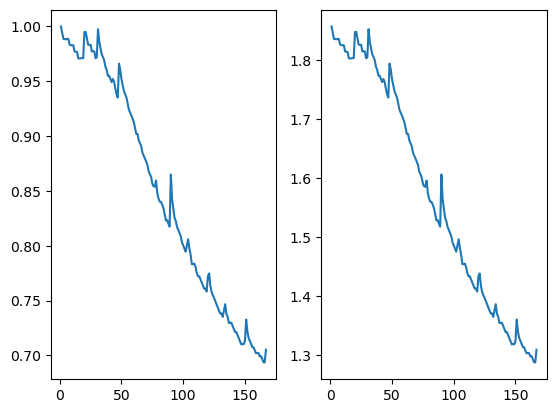

In [624]:
plt.subplot(1,2,1)
plt.plot(b5_SOH_target['cycle'], b5_SOH_target['SOH'])
plt.subplot(1,2,2)
plt.plot(b5_SOH_target['cycle'], b5_SOH_target['capacity'])

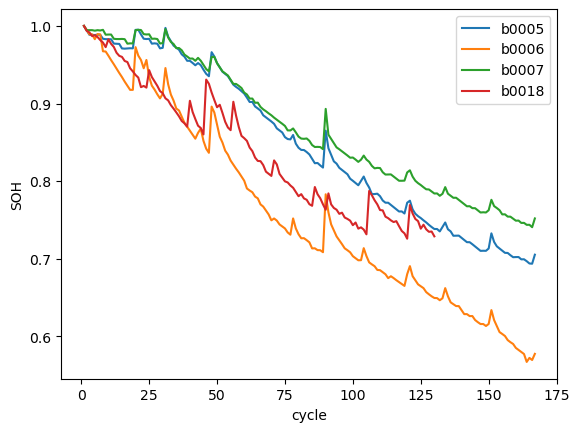

In [632]:
b6_SOH_target = SOH_target_calculation(b6_discharge)
b7_SOH_target = SOH_target_calculation(b7_discharge)
b18_SOH_target = SOH_target_calculation(b18_discharge)
plt.plot(b5_SOH_target['cycle'], b5_SOH_target['SOH'])
plt.plot(b6_SOH_target['cycle'], b6_SOH_target['SOH'])
plt.plot(b7_SOH_target['cycle'], b7_SOH_target['SOH'])
plt.plot(b18_SOH_target['cycle'], b18_SOH_target['SOH'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['b0005', 'b0006', 'b0007', 'b0018'])

# Conclusion: i am not sure if NASA dataset can be trusted
However, many researchers have studied with NASA dataset. So, let me try writing ANN model with NASA dataset.
# Start to write learning model from here

In [635]:
def inout_dataframe(discharge_arr, term_voltage):
    SOH_target = []
    input_features = []
    initial_capacity = discharge_arr[0][1]
    for i in range(len(discharge_arr)-1):
        cycle = discharge_arr[i][0]
        capacity = discharge_arr[i][1]
        SOH = capacity/initial_capacity
        for j in range(len(discharge_arr[i][3])):
            voltage = discharge_arr[i][3][j]
            current = discharge_arr[i][4][j]
            temperature = discharge_arr[i][5][j]
            coulomb = discharge_arr[i][6][j]
            time = discharge_arr[i][9][j]
            
            if voltage >= term_voltage:
                SOH_target.append(SOH)
                input_features.append([cycle, voltage, current, temperature, coulomb, time])
            else:
                break
            
    return [pd.DataFrame(data=SOH_target, columns=['SOH']), 
            pd.DataFrame(data=input_features, columns=['cycle', 'voltage', 'current', 'temperature', 'coulomb', 'time'])]

            #discharge_arr.append([counter, capacity, coulomb_capacity, 
                                  #voltage, current, temperature, coulomb, current_load, voltage_load, time])

In [636]:
b5_SOH_target, b5_inputs = inout_dataframe(b5_discharge, 2.7)
print(b5_SOH_target.shape, b5_inputs.shape)

(45036, 1) (45036, 6)


# for learning
## input features
'voltage', 'current', 'temperature', 'coulomb', 'time'

## target
SOH

In [637]:
b5_SOH_target

SOH
0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      1.000000
...         ...
45031  0.705103
45032  0.705103
45033  0.705103
45034  0.705103
45035  0.705103

[45036 rows x 1 columns]

In [638]:
b5_inputs

cycle   voltage   current  temperature   coulomb      time
0          1  4.191492 -0.004902    24.330034  0.000000     0.000
1          1  4.190749 -0.001478    24.325993 -0.000015    16.781
2          1  3.974871 -2.012528    24.389085 -0.005293    35.703
3          1  3.951717 -2.013979    24.544752 -0.010110    53.781
4          1  3.934352 -2.011144    24.731385 -0.010142    71.922
...      ...       ...       ...          ...       ...       ...
45031    167  2.896440 -2.011362    40.302149 -0.005318  2308.016
45032    167  2.866654 -2.014975    40.404162 -0.005347  2317.578
45033    167  2.831597 -2.011871    40.501529 -0.005348  2327.141
45034    167  2.790443 -2.011597    40.649221 -0.005274  2336.578
45035    167  2.740493 -2.014447    40.778508 -0.005295  2346.047

[45036 rows x 6 columns]

In [639]:
last = len(b5_SOH_target['SOH'])-1
print(b5_SOH_target['SOH'][last], b5_inputs['voltage'][last])

0.705103277055252 2.740493324451625


In [702]:
input_attributes = ['voltage', 'current', 'temperature', 'coulomb', 'time']
b5_train_inputs = b5_inputs[input_attributes]
scale = MinMaxScaler(feature_range=(0,1))
b5_train_inputs  = scale.fit_transform(b5_train_inputs)
#b5_train_SOH  = scale.fit_transform(b5_SOH_target)
b5_train_SOH  = b5_SOH_target.to_numpy()
last = len(b5_train_SOH)-1
print(b5_train_SOH[last], b5_train_inputs[last][0], b5_inputs['voltage'][last])

[0.70510328] 0.02627202702865672 2.740493324451625


In [703]:
b5_train_SOH

array([[1.        ],
       [1.        ],
       [1.        ],
       ...,
       [0.70510328],
       [0.70510328],
       [0.70510328]])

In [704]:
b5_train_inputs

array([[0.97935644, 0.99467547, 0.0621255 , 0.99899624, 0.        ],
       [0.97886857, 0.9963578 , 0.06190042, 0.99765782, 0.00504353],
       [0.83706959, 0.00814246, 0.06541503, 0.52255531, 0.01073053],
       ...,
       [0.08611343, 0.00846529, 0.96298032, 0.51755822, 0.6994221 ],
       [0.05908148, 0.00860007, 0.97120767, 0.52430005, 0.70225839],
       [0.02627203, 0.00719961, 0.97840978, 0.52238549, 0.7051043 ]])

In [705]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [836]:
import time

class custom_train:
    def __init__(self, model, optimizer_fn, loss_fn, metric_fn):
        self.model = model
        self.optimizer = optimizer_fn
        self.loss_fn = loss_fn
        self.metrics = metric_fn

    #tf.function
    def train_step(self, x, y):
        with tf.GradientTape() as tape:
            #print(f'x:{x}, y:{y} {type(x)}')
            logits = self.model(x, training=True)
            loss_value = self.loss_fn(y, logits)
        grads = tape.gradient(loss_value, self.model.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_weights))
        self.metrics.update_state(y, logits)
        return loss_value

    def train(self, inputs, outputs, epochs, epoch_log, loss_threshold):
        loss_list = []
        epoch_list = []
        start_time = time.time()
        for epoch in range(epochs):
            loss_value = self.train_step(inputs, outputs)
            
            # Display metrics at the end of each epoch.
            train_acc = self.metrics.result()
            
            if epoch%epoch_log==0:
                loss_list.append(loss_value)
                epoch_list.append(epoch)
                print(
                    "Training acc over epoch: %.4f Training loss (for one batch) at step %d: %.4f Time taken: %.2fs " 
                    % (float(train_acc), epoch, float(loss_value), (time.time() - start_time))
                )
            if loss_value <= loss_threshold:
                break
            # Reset training metrics at the end of each epoch
            self.metrics.reset_states()
            
        return loss_list, epoch_list

In [837]:
loss_list = []
epoch_list = []

input_layer = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer = keras.layers.Dense(10, activation='relu')(input_layer)
#output_layer = keras.layers.Dense(1, activation='relu')(hidden_layer)
output_layer = keras.layers.Dense(1, activation='sigmoid')(hidden_layer)
model = keras.Model(input_layer, output_layer)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train = custom_train(model, optimizer, loss_function, metric)
model.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_44 (Dense)            (None, 10)                60        
                                                                 
 dense_45 (Dense)            (None, 1)                 11        
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


In [879]:
loss_list, epoch_list = my_train.train(b5_train_inputs, b5_train_SOH, 2000, 200, 0.001)

Training acc over epoch: 0.1181 Training loss (for one batch) at step 0: 0.0258 Time taken: 0.02s 
Training acc over epoch: 0.1157 Training loss (for one batch) at step 200: 0.0248 Time taken: 2.79s 
Training acc over epoch: 0.1117 Training loss (for one batch) at step 400: 0.0231 Time taken: 5.46s 
Training acc over epoch: 0.1060 Training loss (for one batch) at step 600: 0.0209 Time taken: 8.31s 
Training acc over epoch: 0.1000 Training loss (for one batch) at step 800: 0.0188 Time taken: 10.97s 
Training acc over epoch: 0.0939 Training loss (for one batch) at step 1000: 0.0168 Time taken: 13.65s 
Training acc over epoch: 0.0879 Training loss (for one batch) at step 1200: 0.0150 Time taken: 16.32s 
Training acc over epoch: 0.0824 Training loss (for one batch) at step 1400: 0.0135 Time taken: 18.97s 
Training acc over epoch: 0.0776 Training loss (for one batch) at step 1600: 0.0122 Time taken: 21.67s 
Training acc over epoch: 0.0735 Training loss (for one batch) at step 1800: 0.0110 T

In [884]:
plt.plot(epoch_list, loss_list)

In [885]:
b6_SOH_target, b6_inputs = inout_dataframe(b6_discharge, 2.5)

b6_validation_inputs = b6_inputs[input_attributes]
b6_validation_inputs  = scale.fit_transform(b6_validation_inputs)
print(b6_SOH_target.shape,b6_inputs.shape, b6_validation_inputs.shape)

(44291, 1) (44291, 6) (44291, 5)


In [886]:
b6_SOH_predict = model.predict(b6_validation_inputs)

1385/1385 [==============================] - 1s 1ms/step


In [887]:
b6_SOH_predict.shape

(44291, 1)

In [888]:
b6_SOH_predict

array([[0.4161517 ],
       [0.44808072],
       [0.8621936 ],
       ...,
       [0.01124044],
       [0.00915394],
       [0.00675826]], dtype=float32)

In [889]:
last = len(b6_SOH_target['SOH'])-1
print(b6_SOH_target['SOH'][last], b6_inputs['cycle'][last], len(b6_SOH_target['SOH']), len(b6_SOH_predict))

0.5772874675283711 167 44291 44291


In [890]:
b6_SOH_validation = b6_inputs.loc[(b6_inputs['cycle'] >= 1), ['cycle']]
b6_SOH_validation['SOH_predict'] = b6_SOH_predict
b6_SOH_validation['SOH_target'] = b6_SOH_target.to_numpy()
b6_SOH_validation

cycle  SOH_predict  SOH_target
0          1     0.416152    1.000000
1          1     0.448081    1.000000
2          1     0.862194    1.000000
3          1     0.994280    1.000000
4          1     0.992977    1.000000
...      ...          ...         ...
44286    167     0.015934    0.577287
44287    167     0.013332    0.577287
44288    167     0.011240    0.577287
44289    167     0.009154    0.577287
44290    167     0.006758    0.577287

[44291 rows x 3 columns]

In [891]:
rms = np.sqrt(mean_squared_error(b6_SOH_validation['SOH_predict'], b6_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

Root Mean Square Error:  0.41719247416393024


# The results come from where the model learns from B0005 and validate with B0006

Text(0.5, 1.0, 'SOH real-time prediction')

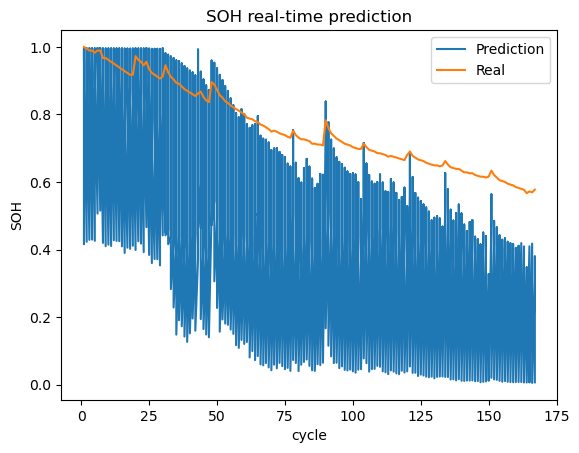

In [892]:
plt.plot(b6_SOH_validation['cycle'], b6_SOH_validation['SOH_predict'])
plt.plot(b6_SOH_validation['cycle'], b6_SOH_validation['SOH_target'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Real'])
plt.title('SOH real-time prediction')

In [893]:
b6_SOH_validation_mean = b6_SOH_validation.groupby(['cycle']).mean().reset_index()
b6_SOH_validation_mean

cycle  SOH_predict  SOH_target
0        1     0.978964    1.000000
1        2     0.979901    0.994990
2        3     0.980463    0.989185
3        4     0.980424    0.989165
4        5     0.979833    0.982898
..     ...          ...         ...
162    163     0.027167    0.577101
163    164     0.022438    0.566893
164    165     0.025972    0.572092
165    166     0.025613    0.569339
166    167     0.029514    0.577287

[167 rows x 3 columns]

In [916]:
rms = np.sqrt(mean_squared_error(b6_SOH_validation_mean['SOH_predict'], b6_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)

Root Mean Square Error:  0.4113572920049391


# Result shows that mean_SOH is better than real-time SOH although both results are poor

In [917]:
plt.plot(b6_SOH_validation_mean['cycle'], b6_SOH_validation_mean['SOH_predict'])
plt.plot(b6_SOH_validation_mean['cycle'], b6_SOH_validation_mean['SOH_target'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Real'])
plt.title('SOH real-time prediction')

Text(0.5, 1.0, 'SOH real-time prediction')

# Validation with with B0007

In [918]:
b7_SOH_target, b7_inputs = inout_dataframe(b7_discharge, 2.2)

b7_validation_inputs = b7_inputs[input_attributes]
b7_validation_inputs  = scale.fit_transform(b7_validation_inputs)
b7_SOH_predict = model.predict(b7_validation_inputs)

1506/1506 [==============================] - 2s 1ms/step


In [919]:
b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

Root Mean Square Error:  0.12168697492203077


# The results come from where the model learns from B0005 and validate with B0007

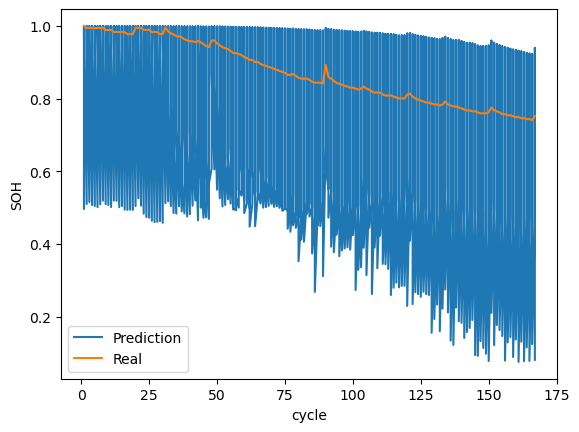

In [920]:
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Real'])

In [921]:
b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
b7_SOH_validation_mean

cycle  SOH_predict  SOH_target
0        1     0.991529    1.000000
1        2     0.991880    0.994492
2        3     0.991955    0.994506
3        4     0.991792    0.994563
4        5     0.991727    0.993865
..     ...          ...         ...
162    163     0.836779    0.746143
163    164     0.836446    0.743592
164    165     0.833676    0.743679
165    166     0.833328    0.740569
166    167     0.855364    0.751849

[167 rows x 3 columns]

# Result shows that mean_SOH is better than real-time SOH although both results are poor

In [922]:
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)

Root Mean Square Error:  0.0861854260240201


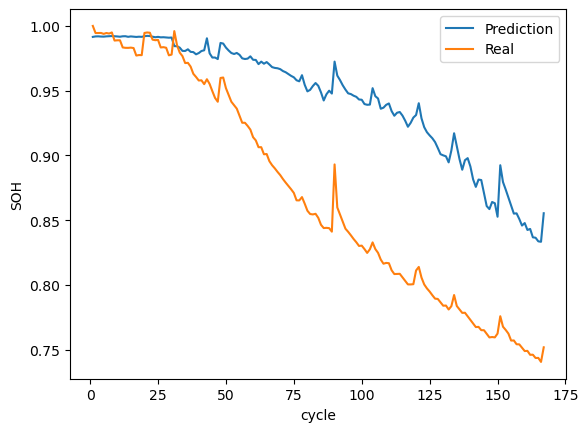

In [923]:
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_target'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Real'])

# Validation with with B0018

In [932]:
b18_SOH_target, b18_inputs = inout_dataframe(b18_discharge, 2.5)

b18_validation_inputs = b18_inputs[input_attributes]
b18_idation_inputs  = scale.fit_transform(b18_validation_inputs)
b18_SOH_predict = model.predict(b18_validation_inputs)

993/993 [==============================] - 1s 980us/step


In [933]:
b18_SOH_validation = b18_inputs.loc[(b18_inputs['cycle'] >= 1), ['cycle']]
b18_SOH_validation['SOH_predict'] = b18_SOH_predict
b18_SOH_validation['SOH_target'] = b18_SOH_target.to_numpy()
rms = np.sqrt(mean_squared_error(b18_SOH_validation['SOH_predict'], b18_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

Root Mean Square Error:  0.16508602966196895


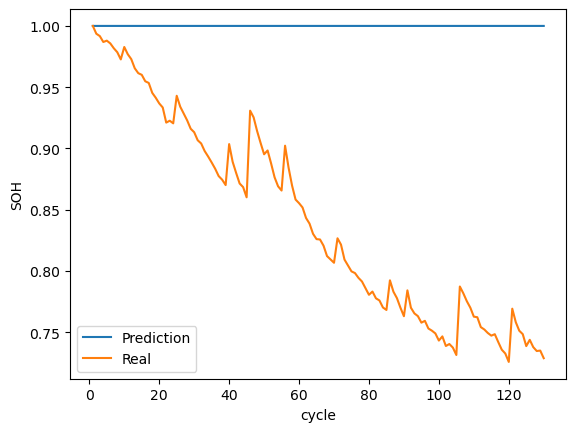

In [934]:
plt.plot(b18_SOH_validation['cycle'], b18_SOH_validation['SOH_predict'])
plt.plot(b18_SOH_validation['cycle'], b18_SOH_validation['SOH_target'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Real'])

In [935]:
b18_SOH_validation_mean = b18_SOH_validation.groupby(['cycle']).mean().reset_index()
b18_SOH_validation_mean

cycle  SOH_predict  SOH_target
0        1          1.0    1.000000
1        2          1.0    0.993634
2        3          1.0    0.991697
3        4          1.0    0.986884
4        5          1.0    0.987976
..     ...          ...         ...
125    126          1.0    0.743769
126    127          1.0    0.737820
127    128          1.0    0.734627
128    129          1.0    0.734987
129    130          1.0    0.728766

[130 rows x 3 columns]

In [936]:
rms = np.sqrt(mean_squared_error(b18_SOH_validation_mean['SOH_predict'], b18_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)

Root Mean Square Error:  0.1787661766306532


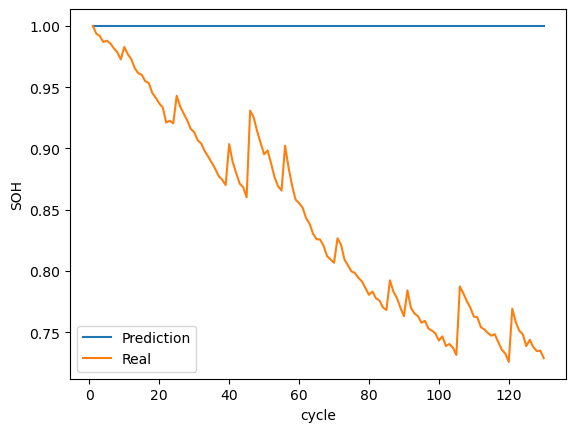

In [937]:
plt.plot(b18_SOH_validation_mean['cycle'], b18_SOH_validation_mean['SOH_predict'])
plt.plot(b18_SOH_validation_mean['cycle'], b18_SOH_validation_mean['SOH_target'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Real'])

# Training with 0007

In [940]:
input_attributes = ['voltage', 'current', 'temperature', 'coulomb', 'time']
b7_train_inputs = b7_inputs[input_attributes]
scale = MinMaxScaler(feature_range=(0,1))
b7_train_inputs  = scale.fit_transform(b7_train_inputs)
b7_train_SOH  = b7_SOH_target.to_numpy()
last = len(b7_train_SOH)-1
print(b7_train_SOH[last], b7_train_inputs[last][0], b7_inputs['voltage'][last])

[0.75184938] 0.0132320260218306 2.2279347416731947


In [950]:
loss_list = []
epoch_list = []

input_layer_b7 = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7 = keras.layers.Dense(10, activation='relu')(input_layer_b7)
output_layer_b7 = keras.layers.Dense(1, activation='sigmoid')(hidden_layer_b7)
model_b7 = keras.Model(input_layer_b7, output_layer_b7)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train_b7 = custom_train(model_b7, optimizer, loss_function, metric)
model_b7.summary()

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_54 (Dense)            (None, 10)                60        
                                                                 
 dense_55 (Dense)            (None, 1)                 11        
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


In [990]:
loss_list, epoch_list = my_train_b7.train(b7_train_inputs, b7_train_SOH, 10000, 200, 0.0001)

Training acc over epoch: 0.0300 Training loss (for one batch) at step 0: 0.0018 Time taken: 0.01s 
Training acc over epoch: 0.0297 Training loss (for one batch) at step 200: 0.0018 Time taken: 2.83s 
Training acc over epoch: 0.0295 Training loss (for one batch) at step 400: 0.0017 Time taken: 5.60s 
Training acc over epoch: 0.0292 Training loss (for one batch) at step 600: 0.0017 Time taken: 8.44s 
Training acc over epoch: 0.0290 Training loss (for one batch) at step 800: 0.0017 Time taken: 11.18s 
Training acc over epoch: 0.0288 Training loss (for one batch) at step 1000: 0.0017 Time taken: 13.91s 
Training acc over epoch: 0.0287 Training loss (for one batch) at step 1200: 0.0016 Time taken: 16.63s 
Training acc over epoch: 0.0285 Training loss (for one batch) at step 1400: 0.0016 Time taken: 19.41s 
Training acc over epoch: 0.0284 Training loss (for one batch) at step 1600: 0.0016 Time taken: 22.24s 
Training acc over epoch: 0.0283 Training loss (for one batch) at step 1800: 0.0016 T

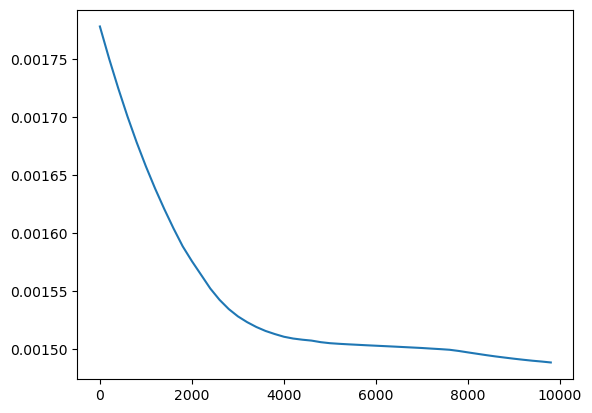

In [991]:
plt.plot(epoch_list, loss_list)

In [992]:
b6_SOH_target, b6_inputs = inout_dataframe(b6_discharge, 2.5)

b6_validation_inputs = b6_inputs[input_attributes]
b6_validation_inputs  = scale.fit_transform(b6_validation_inputs)
print(b6_SOH_target.shape,b6_inputs.shape, b6_validation_inputs.shape)

(44291, 1) (44291, 6) (44291, 5)


1385/1385 [==============================] - 1s 946us/step
Root Mean Square Error:  0.12607889423369528


Text(0.5, 1.0, 'SOH real-time prediction')

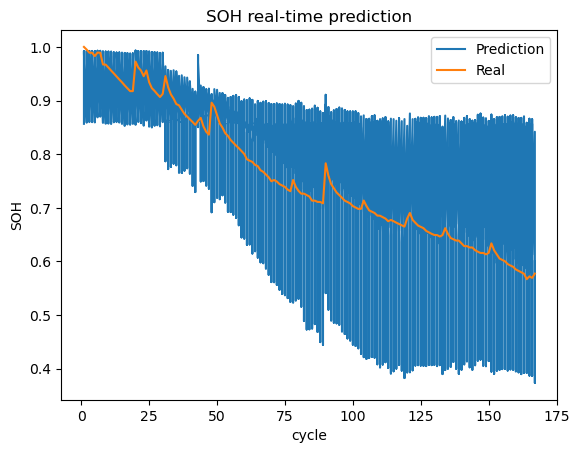

In [993]:
b6_SOH_predict = model_b7.predict(b6_validation_inputs)


b6_SOH_validation = b6_inputs.loc[(b6_inputs['cycle'] >= 1), ['cycle']]
b6_SOH_validation['SOH_predict'] = b6_SOH_predict
b6_SOH_validation['SOH_target'] = b6_SOH_target.to_numpy()
b6_SOH_validation
rms = np.sqrt(mean_squared_error(b6_SOH_validation['SOH_predict'], b6_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

plt.plot(b6_SOH_validation['cycle'], b6_SOH_validation['SOH_predict'])
plt.plot(b6_SOH_validation['cycle'], b6_SOH_validation['SOH_target'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Real'])
plt.title('SOH real-time prediction')

In [994]:
b6_SOH_validation_mean = b6_SOH_validation.groupby(['cycle']).mean().reset_index()
b6_SOH_validation_mean
rms = np.sqrt(mean_squared_error(b6_SOH_validation_mean['SOH_predict'], b6_SOH_validation_mean['SOH_target']))

print('Root Mean Square Error: ', rms)
plt.plot(b6_SOH_validation_mean['cycle'], b6_SOH_validation_mean['SOH_predict'])
plt.plot(b6_SOH_validation_mean['cycle'], b6_SOH_validation_mean['SOH_target'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Real'])
plt.title('SOH real-time prediction')

Root Mean Square Error:  0.09642640790376765


Text(0.5, 1.0, 'SOH real-time prediction')

In [995]:
b7_SOH_predict = model_b7.predict(b7_validation_inputs)

1499/1499 [==============================] - 1s 905us/step


In [1014]:
b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

Root Mean Square Error:  0.10160740895662564
Root Mean Square Error:  0.07731907604177506


Text(0.5, 1.0, 'SOH real-time prediction')

In [1015]:
b7_SOH_target, b7_inputs = inout_dataframe(b7_discharge, 2.5)

b7_validation_inputs = b7_inputs[input_attributes]
b7_validation_inputs  = scale.fit_transform(b7_validation_inputs)

In [1016]:
b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
b7_SOH_validation_mean
rms = np.sqrt(mean_squared_error(b6_SOH_validation_mean['SOH_predict'], b6_SOH_validation_mean['SOH_target']))

print('Root Mean Square Error: ', rms)
plt.plot(b6_SOH_validation_mean['cycle'], b6_SOH_validation_mean['SOH_predict'])
plt.plot(b6_SOH_validation_mean['cycle'], b6_SOH_validation_mean['SOH_target'])
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Real'])
plt.title('SOH real-time prediction')

Root Mean Square Error:  0.09642640790376765


Text(0.5, 1.0, 'SOH real-time prediction')

# Two hidden layer

In [1039]:
input_layer_b7_2h = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_2h = keras.layers.Dense(10, activation='relu')(input_layer_b7_2h)
hidden_layer2_b7_2h = keras.layers.Dense(10, activation='relu')(hidden_layer_b7_2h)
output_layer_b7_2h = keras.layers.Dense(1, activation='sigmoid')(hidden_layer2_b7_2h)
model_b7_2h = keras.Model(input_layer_b7_2h, output_layer_b7_2h)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train_b7_2h = custom_train(model_b7_2h, optimizer, loss_function, metric)
model_b7_2h.summary()

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_66 (Dense)            (None, 10)                60        
                                                                 
 dense_67 (Dense)            (None, 10)                110       
                                                                 
 dense_68 (Dense)            (None, 1)                 11        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [1044]:
loss_list, epoch_list = my_train_b7_2h.train(b7_train_inputs, b7_train_SOH, 5000, 200, 0.0001)

Training acc over epoch: 0.0118 Training loss (for one batch) at step 0: 0.0004 Time taken: 0.02s 
Training acc over epoch: 0.0117 Training loss (for one batch) at step 200: 0.0004 Time taken: 2.84s 
Training acc over epoch: 0.0116 Training loss (for one batch) at step 400: 0.0004 Time taken: 5.75s 
Training acc over epoch: 0.0116 Training loss (for one batch) at step 600: 0.0004 Time taken: 8.53s 
Training acc over epoch: 0.0113 Training loss (for one batch) at step 800: 0.0004 Time taken: 11.25s 
Training acc over epoch: 0.0112 Training loss (for one batch) at step 1000: 0.0004 Time taken: 14.03s 
Training acc over epoch: 0.0111 Training loss (for one batch) at step 1200: 0.0003 Time taken: 16.78s 
Training acc over epoch: 0.0111 Training loss (for one batch) at step 1400: 0.0003 Time taken: 19.64s 
Training acc over epoch: 0.0111 Training loss (for one batch) at step 1600: 0.0003 Time taken: 22.51s 
Training acc over epoch: 0.0111 Training loss (for one batch) at step 1800: 0.0003 T

In [1045]:
plt.plot(epoch_list, loss_list)

In [1046]:
b7_SOH_predict = model_b7_2h.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()

rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

1499/1499 [==============================] - 1s 971us/step
Root Mean Square Error:  0.11754614806030399
Root Mean Square Error:  0.09985035099040623


Text(0.5, 1.0, 'SOH real-time prediction')

# Three hidden layer

In [1047]:
input_layer_b7_h3 = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h3 = keras.layers.Dense(10, activation='relu')(input_layer_b7_h3)
hidden_layer2_b7_h3 = keras.layers.Dense(10, activation='relu')(hidden_layer_b7_h3)
hidden_layer3_b7_h3 = keras.layers.Dense(10, activation='relu')(hidden_layer2_b7_h3)
output_layer_b7_h3 = keras.layers.Dense(1, activation='sigmoid')(hidden_layer3_b7_h3)
model_b7_h3 = keras.Model(input_layer_b7_h3, output_layer_b7_h3)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train_b7_h3 = custom_train(model_b7_h3, optimizer, loss_function, metric)
model_b7_h3.summary()

Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_69 (Dense)            (None, 10)                60        
                                                                 
 dense_70 (Dense)            (None, 10)                110       
                                                                 
 dense_71 (Dense)            (None, 10)                110       
                                                                 
 dense_72 (Dense)            (None, 1)                 11        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [1051]:
loss_list, epoch_list = my_train_b7_h3.train(b7_train_inputs, b7_train_SOH, 5000, 200, 0.0001)

Training acc over epoch: 0.0132 Training loss (for one batch) at step 0: 0.0004 Time taken: 0.02s 
Training acc over epoch: 0.0138 Training loss (for one batch) at step 200: 0.0005 Time taken: 3.04s 
Training acc over epoch: 0.0131 Training loss (for one batch) at step 400: 0.0004 Time taken: 5.97s 
Training acc over epoch: 0.0130 Training loss (for one batch) at step 600: 0.0004 Time taken: 8.88s 
Training acc over epoch: 0.0129 Training loss (for one batch) at step 800: 0.0004 Time taken: 11.85s 
Training acc over epoch: 0.0129 Training loss (for one batch) at step 1000: 0.0004 Time taken: 14.64s 
Training acc over epoch: 0.0128 Training loss (for one batch) at step 1200: 0.0004 Time taken: 17.49s 
Training acc over epoch: 0.0127 Training loss (for one batch) at step 1400: 0.0004 Time taken: 20.31s 
Training acc over epoch: 0.0127 Training loss (for one batch) at step 1600: 0.0004 Time taken: 23.16s 
Training acc over epoch: 0.0126 Training loss (for one batch) at step 1800: 0.0004 T

In [1052]:
plt.plot(epoch_list, loss_list)

In [1092]:
b7_SOH_predict = model_b7_h3.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

1499/1499 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.10164405070847275
Root Mean Square Error:  0.08715742082527035


Text(0.5, 1.0, 'SOH real-time prediction')

# Four hidden layer

In [1056]:
input_layer_b7_h4 = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h4 = keras.layers.Dense(10, activation='relu')(input_layer_b7_h4)
hidden_layer2_b7_h4 = keras.layers.Dense(10, activation='relu')(hidden_layer_b7_h4)
hidden_layer3_b7_h4 = keras.layers.Dense(10, activation='relu')(hidden_layer2_b7_h4)
hidden_layer4_b7_h4 = keras.layers.Dense(10, activation='relu')(hidden_layer3_b7_h4)
output_layer_b7_h4 = keras.layers.Dense(1, activation='sigmoid')(hidden_layer4_b7_h4)
model_b7_h4 = keras.Model(input_layer_b7_h4, output_layer_b7_h4)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train_b7_h4 = custom_train(model_b7_h4, optimizer, loss_function, metric)
model_b7_h4.summary()

Model: "model_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_36 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_83 (Dense)            (None, 10)                60        
                                                                 
 dense_84 (Dense)            (None, 10)                110       
                                                                 
 dense_85 (Dense)            (None, 10)                110       
                                                                 
 dense_86 (Dense)            (None, 10)                110       
                                                                 
 dense_87 (Dense)            (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable para

In [1111]:
loss_list, epoch_list = my_train_b7_h4.train(b7_train_inputs, b7_train_SOH, 100000, 200, 0.00001)

Training acc over epoch: 0.0095 Training loss (for one batch) at step 0: 0.0002 Time taken: 0.02s 
Training acc over epoch: 0.0091 Training loss (for one batch) at step 200: 0.0002 Time taken: 3.25s 
Training acc over epoch: 0.0091 Training loss (for one batch) at step 400: 0.0002 Time taken: 6.32s 
Training acc over epoch: 0.0094 Training loss (for one batch) at step 600: 0.0002 Time taken: 9.41s 
Training acc over epoch: 0.0090 Training loss (for one batch) at step 800: 0.0002 Time taken: 12.55s 
Training acc over epoch: 0.0090 Training loss (for one batch) at step 1000: 0.0002 Time taken: 15.78s 
Training acc over epoch: 0.0091 Training loss (for one batch) at step 1200: 0.0002 Time taken: 18.92s 
Training acc over epoch: 0.0090 Training loss (for one batch) at step 1400: 0.0002 Time taken: 22.05s 
Training acc over epoch: 0.0090 Training loss (for one batch) at step 1600: 0.0002 Time taken: 25.13s 
Training acc over epoch: 0.0090 Training loss (for one batch) at step 1800: 0.0002 T

Training acc over epoch: 0.0078 Training loss (for one batch) at step 15800: 0.0002 Time taken: 245.25s 
Training acc over epoch: 0.0076 Training loss (for one batch) at step 16000: 0.0002 Time taken: 248.33s 
Training acc over epoch: 0.0076 Training loss (for one batch) at step 16200: 0.0002 Time taken: 251.56s 
Training acc over epoch: 0.0076 Training loss (for one batch) at step 16400: 0.0002 Time taken: 254.75s 
Training acc over epoch: 0.0076 Training loss (for one batch) at step 16600: 0.0002 Time taken: 257.87s 
Training acc over epoch: 0.0083 Training loss (for one batch) at step 16800: 0.0002 Time taken: 260.91s 
Training acc over epoch: 0.0076 Training loss (for one batch) at step 17000: 0.0002 Time taken: 263.98s 
Training acc over epoch: 0.0081 Training loss (for one batch) at step 17200: 0.0002 Time taken: 267.06s 
Training acc over epoch: 0.0076 Training loss (for one batch) at step 17400: 0.0002 Time taken: 270.17s 
Training acc over epoch: 0.0076 Training loss (for one 

Training acc over epoch: 0.0074 Training loss (for one batch) at step 31600: 0.0001 Time taken: 489.80s 
Training acc over epoch: 0.0074 Training loss (for one batch) at step 31800: 0.0001 Time taken: 492.91s 
Training acc over epoch: 0.0075 Training loss (for one batch) at step 32000: 0.0002 Time taken: 496.12s 
Training acc over epoch: 0.0074 Training loss (for one batch) at step 32200: 0.0001 Time taken: 499.21s 
Training acc over epoch: 0.0074 Training loss (for one batch) at step 32400: 0.0001 Time taken: 502.24s 
Training acc over epoch: 0.0075 Training loss (for one batch) at step 32600: 0.0002 Time taken: 505.34s 
Training acc over epoch: 0.0074 Training loss (for one batch) at step 32800: 0.0001 Time taken: 508.39s 
Training acc over epoch: 0.0074 Training loss (for one batch) at step 33000: 0.0001 Time taken: 511.60s 
Training acc over epoch: 0.0073 Training loss (for one batch) at step 33200: 0.0001 Time taken: 514.76s 
Training acc over epoch: 0.0074 Training loss (for one 

Training acc over epoch: 0.0070 Training loss (for one batch) at step 47400: 0.0001 Time taken: 735.30s 
Training acc over epoch: 0.0071 Training loss (for one batch) at step 47600: 0.0001 Time taken: 738.31s 
Training acc over epoch: 0.0069 Training loss (for one batch) at step 47800: 0.0001 Time taken: 741.38s 
Training acc over epoch: 0.0070 Training loss (for one batch) at step 48000: 0.0001 Time taken: 744.42s 
Training acc over epoch: 0.0070 Training loss (for one batch) at step 48200: 0.0001 Time taken: 747.47s 
Training acc over epoch: 0.0070 Training loss (for one batch) at step 48400: 0.0001 Time taken: 750.67s 
Training acc over epoch: 0.0072 Training loss (for one batch) at step 48600: 0.0001 Time taken: 753.76s 
Training acc over epoch: 0.0071 Training loss (for one batch) at step 48800: 0.0001 Time taken: 756.80s 
Training acc over epoch: 0.0076 Training loss (for one batch) at step 49000: 0.0001 Time taken: 759.88s 
Training acc over epoch: 0.0069 Training loss (for one 

Training acc over epoch: 0.0068 Training loss (for one batch) at step 63200: 0.0001 Time taken: 981.20s 
Training acc over epoch: 0.0070 Training loss (for one batch) at step 63400: 0.0001 Time taken: 984.25s 
Training acc over epoch: 0.0070 Training loss (for one batch) at step 63600: 0.0001 Time taken: 987.35s 
Training acc over epoch: 0.0068 Training loss (for one batch) at step 63800: 0.0001 Time taken: 990.50s 
Training acc over epoch: 0.0068 Training loss (for one batch) at step 64000: 0.0001 Time taken: 993.60s 
Training acc over epoch: 0.0068 Training loss (for one batch) at step 64200: 0.0001 Time taken: 996.69s 
Training acc over epoch: 0.0070 Training loss (for one batch) at step 64400: 0.0001 Time taken: 999.71s 
Training acc over epoch: 0.0070 Training loss (for one batch) at step 64600: 0.0001 Time taken: 1002.76s 
Training acc over epoch: 0.0069 Training loss (for one batch) at step 64800: 0.0001 Time taken: 1005.83s 
Training acc over epoch: 0.0070 Training loss (for on

Training acc over epoch: 0.0069 Training loss (for one batch) at step 78800: 0.0001 Time taken: 1222.25s 
Training acc over epoch: 0.0066 Training loss (for one batch) at step 79000: 0.0001 Time taken: 1225.29s 
Training acc over epoch: 0.0067 Training loss (for one batch) at step 79200: 0.0001 Time taken: 1228.34s 
Training acc over epoch: 0.0066 Training loss (for one batch) at step 79400: 0.0001 Time taken: 1231.53s 
Training acc over epoch: 0.0067 Training loss (for one batch) at step 79600: 0.0001 Time taken: 1234.58s 
Training acc over epoch: 0.0067 Training loss (for one batch) at step 79800: 0.0001 Time taken: 1237.62s 
Training acc over epoch: 0.0067 Training loss (for one batch) at step 80000: 0.0001 Time taken: 1240.65s 
Training acc over epoch: 0.0066 Training loss (for one batch) at step 80200: 0.0001 Time taken: 1243.76s 
Training acc over epoch: 0.0066 Training loss (for one batch) at step 80400: 0.0001 Time taken: 1246.97s 
Training acc over epoch: 0.0067 Training loss 

Training acc over epoch: 0.0071 Training loss (for one batch) at step 94400: 0.0001 Time taken: 1463.86s 
Training acc over epoch: 0.0064 Training loss (for one batch) at step 94600: 0.0001 Time taken: 1466.89s 
Training acc over epoch: 0.0066 Training loss (for one batch) at step 94800: 0.0001 Time taken: 1470.06s 
Training acc over epoch: 0.0064 Training loss (for one batch) at step 95000: 0.0001 Time taken: 1473.19s 
Training acc over epoch: 0.0065 Training loss (for one batch) at step 95200: 0.0001 Time taken: 1476.21s 
Training acc over epoch: 0.0064 Training loss (for one batch) at step 95400: 0.0001 Time taken: 1479.30s 
Training acc over epoch: 0.0065 Training loss (for one batch) at step 95600: 0.0001 Time taken: 1482.33s 
Training acc over epoch: 0.0065 Training loss (for one batch) at step 95800: 0.0001 Time taken: 1485.41s 
Training acc over epoch: 0.0064 Training loss (for one batch) at step 96000: 0.0001 Time taken: 1488.58s 
Training acc over epoch: 0.0066 Training loss 

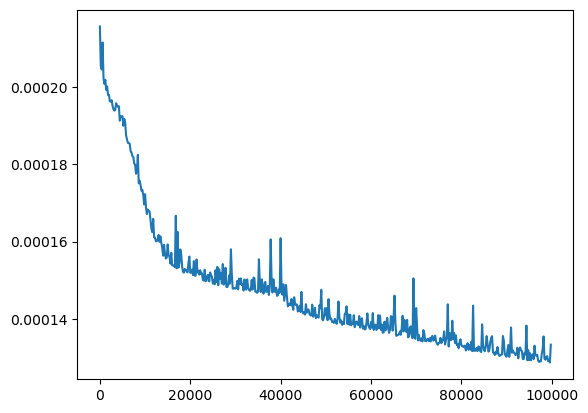

In [1112]:
plt.plot(epoch_list, loss_list)

In [1113]:
b7_SOH_predict = model_b7_h4.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

1499/1499 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.13146664569523128
Root Mean Square Error:  0.11427644986739582


Text(0.5, 1.0, 'SOH real-time prediction')

# three hidden layer, 20 dense

In [1064]:
input_layer_b7_h3_t20 = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h3_t20 = keras.layers.Dense(20, activation='relu')(input_layer_b7_h3_t20)
hidden_layer2_b7_h3_t20 = keras.layers.Dense(20, activation='relu')(hidden_layer_b7_h3_t20)
hidden_layer3_b7_h3_t20 = keras.layers.Dense(20, activation='relu')(hidden_layer2_b7_h3_t20)
output_layer_b7_h3_t20 = keras.layers.Dense(1, activation='sigmoid')(hidden_layer3_b7_h3_t20)
model_b7_h3_t20 = keras.Model(input_layer_b7_h3_t20, output_layer_b7_h3_t20)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train_b7_h3_t20 = custom_train(model_b7_h3_t20, optimizer, loss_function, metric)
model_b7_h3_t20.summary()

Model: "model_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_39 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_96 (Dense)            (None, 20)                120       
                                                                 
 dense_97 (Dense)            (None, 20)                420       
                                                                 
 dense_98 (Dense)            (None, 20)                420       
                                                                 
 dense_99 (Dense)            (None, 1)                 21        
                                                                 
Total params: 981
Trainable params: 981
Non-trainable params: 0
_________________________________________________________________


In [1105]:
loss_list, epoch_list = my_train_b7_h3_t20.train(b7_train_inputs, b7_train_SOH, 10000, 200, 0.0001)

Training acc over epoch: 0.0075 Training loss (for one batch) at step 0: 0.0002 Time taken: 0.02s 
Training acc over epoch: 0.0075 Training loss (for one batch) at step 200: 0.0001 Time taken: 3.12s 
Training acc over epoch: 0.0073 Training loss (for one batch) at step 400: 0.0001 Time taken: 6.08s 
Training acc over epoch: 0.0073 Training loss (for one batch) at step 600: 0.0001 Time taken: 8.98s 
Training acc over epoch: 0.0075 Training loss (for one batch) at step 800: 0.0001 Time taken: 11.97s 
Training acc over epoch: 0.0073 Training loss (for one batch) at step 1000: 0.0001 Time taken: 14.83s 
Training acc over epoch: 0.0073 Training loss (for one batch) at step 1200: 0.0001 Time taken: 17.67s 
Training acc over epoch: 0.0072 Training loss (for one batch) at step 1400: 0.0001 Time taken: 20.72s 
Training acc over epoch: 0.0078 Training loss (for one batch) at step 1600: 0.0002 Time taken: 23.57s 
Training acc over epoch: 0.0072 Training loss (for one batch) at step 1800: 0.0001 T

In [1106]:
plt.plot(epoch_list, loss_list)

In [1107]:
b7_SOH_predict = model_b7_h3_t20.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

1499/1499 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.1389613911037613
Root Mean Square Error:  0.12254133816429609


Text(0.5, 1.0, 'SOH real-time prediction')

# three hidden, 10 dense, sigmoid

In [1071]:
input_layer_b7_h3_sig = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h3_sig = keras.layers.Dense(10, activation='sigmoid')(input_layer_b7_h3_sig)
hidden_layer2_b7_h3_sig = keras.layers.Dense(10, activation='sigmoid')(hidden_layer_b7_h3_sig)
hidden_layer3_b7_h3_sig = keras.layers.Dense(10, activation='sigmoid')(hidden_layer2_b7_h3_sig)
output_layer_b7_h3_sig = keras.layers.Dense(1, activation='sigmoid')(hidden_layer3_b7_h3_sig)
model_b7_h3_sig = keras.Model(input_layer_b7_h3_sig, output_layer_b7_h3_sig)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train_b7_h3_sig = custom_train(model_b7_h3_sig, optimizer, loss_function, metric)
model_b7_h3_sig.summary()

Model: "model_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_40 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_100 (Dense)           (None, 10)                60        
                                                                 
 dense_101 (Dense)           (None, 10)                110       
                                                                 
 dense_102 (Dense)           (None, 10)                110       
                                                                 
 dense_103 (Dense)           (None, 1)                 11        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [1079]:
loss_list, epoch_list = my_train_b7_h3_sig.train(b7_train_inputs, b7_train_SOH, 5000, 200, 0.0001)

Training acc over epoch: 0.0083 Training loss (for one batch) at step 0: 0.0002 Time taken: 0.02s 
Training acc over epoch: 0.0082 Training loss (for one batch) at step 200: 0.0002 Time taken: 3.04s 
Training acc over epoch: 0.0080 Training loss (for one batch) at step 400: 0.0002 Time taken: 6.11s 
Training acc over epoch: 0.0079 Training loss (for one batch) at step 600: 0.0002 Time taken: 9.26s 
Training acc over epoch: 0.0078 Training loss (for one batch) at step 800: 0.0002 Time taken: 12.11s 
Training acc over epoch: 0.0076 Training loss (for one batch) at step 1000: 0.0002 Time taken: 14.98s 
Training acc over epoch: 0.0075 Training loss (for one batch) at step 1200: 0.0002 Time taken: 17.80s 
Training acc over epoch: 0.0074 Training loss (for one batch) at step 1400: 0.0002 Time taken: 20.65s 
Training acc over epoch: 0.0073 Training loss (for one batch) at step 1600: 0.0002 Time taken: 23.52s 
Training acc over epoch: 0.0072 Training loss (for one batch) at step 1800: 0.0002 T

In [1080]:
plt.plot(epoch_list, loss_list)

In [1089]:
b7_SOH_predict = model_b7_h3_sig.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

1499/1499 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.12259336812253398
Root Mean Square Error:  0.11194377646674657


Text(0.5, 1.0, 'SOH real-time prediction')

In [1082]:
input_layer_b7_h3_no = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h3_no = keras.layers.Dense(10)(input_layer_b7_h3_no)
hidden_layer2_b7_h3_no = keras.layers.Dense(10)(hidden_layer_b7_h3_no)
hidden_layer3_b7_h3_no = keras.layers.Dense(10)(hidden_layer2_b7_h3_no)
output_layer_b7_h3_no = keras.layers.Dense(1, activation='sigmoid')(hidden_layer3_b7_h3_no)
model_b7_h3_no = keras.Model(input_layer_b7_h3_no, output_layer_b7_h3_no)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train_b7_h3_no = custom_train(model_b7_h3_no, optimizer, loss_function, metric)
model_b7_h3_no.summary()

Model: "model_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_41 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_104 (Dense)           (None, 10)                60        
                                                                 
 dense_105 (Dense)           (None, 10)                110       
                                                                 
 dense_106 (Dense)           (None, 10)                110       
                                                                 
 dense_107 (Dense)           (None, 1)                 11        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [1093]:
loss_list, epoch_list = my_train_b7_h3_no.train(b7_train_inputs, b7_train_SOH, 1000, 200, 0.0001)

Training acc over epoch: 0.0392 Training loss (for one batch) at step 0: 0.0028 Time taken: 0.02s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 200: 0.0028 Time taken: 3.10s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 400: 0.0028 Time taken: 6.09s 
Training acc over epoch: 0.0391 Training loss (for one batch) at step 600: 0.0028 Time taken: 9.02s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 800: 0.0028 Time taken: 12.05s 


In [1094]:
plt.plot(epoch_list, loss_list)

1499/1499 [==============================] - 2s 990us/step
Root Mean Square Error:  0.05337036152133276
Root Mean Square Error:  0.04170778257748152


Text(0.5, 1.0, 'SOH real-time prediction')

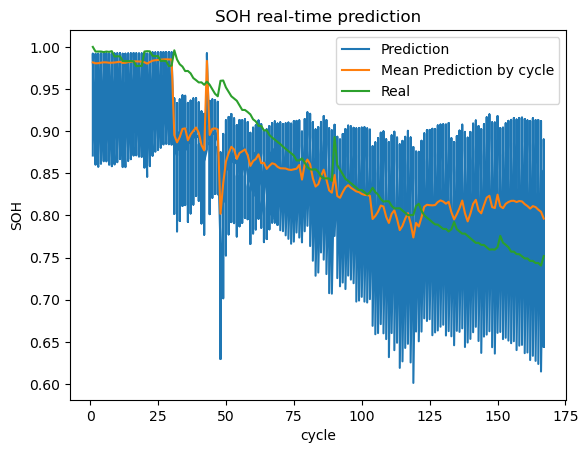

In [1095]:
b7_SOH_predict = model_b7_h3_no.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

# four hidden layer, no activation

In [1097]:
input_layer_b7_h4_no = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h4_no = keras.layers.Dense(10)(input_layer_b7_h4_no)
hidden_layer2_b7_h4_no = keras.layers.Dense(10)(hidden_layer_b7_h4_no)
hidden_layer3_b7_h4_no = keras.layers.Dense(10)(hidden_layer2_b7_h4_no)
hidden_layer4_b7_h4_no = keras.layers.Dense(10)(hidden_layer3_b7_h4_no)
output_layer_b7_h4_no = keras.layers.Dense(1, activation='sigmoid')(hidden_layer4_b7_h4_no)
model_b7_h4_no = keras.Model(input_layer_b7_h4_no, output_layer_b7_h4_no)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train_b7_h4_no = custom_train(model_b7_h4_no, optimizer, loss_function, metric)
model_b7_h4_no.summary()

Model: "model_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_42 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_108 (Dense)           (None, 10)                60        
                                                                 
 dense_109 (Dense)           (None, 10)                110       
                                                                 
 dense_110 (Dense)           (None, 10)                110       
                                                                 
 dense_111 (Dense)           (None, 10)                110       
                                                                 
 dense_112 (Dense)           (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable para

In [1114]:
loss_list, epoch_list = my_train_b7_h4_no.train(b7_train_inputs, b7_train_SOH, 100000, 200, 0.00001)

Training acc over epoch: 0.0392 Training loss (for one batch) at step 0: 0.0028 Time taken: 0.02s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 200: 0.0028 Time taken: 3.18s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 400: 0.0028 Time taken: 6.20s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 600: 0.0028 Time taken: 9.35s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 800: 0.0028 Time taken: 12.34s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 1000: 0.0028 Time taken: 15.29s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 1200: 0.0028 Time taken: 18.26s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 1400: 0.0028 Time taken: 21.24s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 1600: 0.0028 Time taken: 24.24s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 1800: 0.0028 T

Training acc over epoch: 0.0392 Training loss (for one batch) at step 15800: 0.0028 Time taken: 237.31s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 16000: 0.0028 Time taken: 240.25s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 16200: 0.0028 Time taken: 243.47s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 16400: 0.0028 Time taken: 246.42s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 16600: 0.0028 Time taken: 249.56s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 16800: 0.0028 Time taken: 252.49s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 17000: 0.0028 Time taken: 255.47s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 17200: 0.0028 Time taken: 258.39s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 17400: 0.0028 Time taken: 261.35s 
Training acc over epoch: 0.0392 Training loss (for one 

Training acc over epoch: 0.0392 Training loss (for one batch) at step 31600: 0.0028 Time taken: 474.13s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 31800: 0.0028 Time taken: 477.09s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 32000: 0.0028 Time taken: 480.04s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 32200: 0.0028 Time taken: 482.99s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 32400: 0.0028 Time taken: 485.93s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 32600: 0.0028 Time taken: 489.02s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 32800: 0.0028 Time taken: 492.05s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 33000: 0.0028 Time taken: 494.98s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 33200: 0.0028 Time taken: 497.93s 
Training acc over epoch: 0.0392 Training loss (for one 

Training acc over epoch: 0.0392 Training loss (for one batch) at step 47400: 0.0028 Time taken: 710.49s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 47600: 0.0028 Time taken: 713.60s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 47800: 0.0028 Time taken: 716.57s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 48000: 0.0028 Time taken: 719.52s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 48200: 0.0028 Time taken: 722.59s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 48400: 0.0028 Time taken: 725.89s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 48600: 0.0028 Time taken: 729.17s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 48800: 0.0028 Time taken: 732.40s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 49000: 0.0028 Time taken: 735.48s 
Training acc over epoch: 0.0392 Training loss (for one 

Training acc over epoch: 0.0392 Training loss (for one batch) at step 63200: 0.0028 Time taken: 948.84s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 63400: 0.0028 Time taken: 951.81s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 63600: 0.0028 Time taken: 954.89s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 63800: 0.0028 Time taken: 957.83s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 64000: 0.0028 Time taken: 960.78s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 64200: 0.0028 Time taken: 963.76s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 64400: 0.0028 Time taken: 966.70s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 64600: 0.0028 Time taken: 970.14s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 64800: 0.0028 Time taken: 973.19s 
Training acc over epoch: 0.0392 Training loss (for one 

Training acc over epoch: 0.0392 Training loss (for one batch) at step 78800: 0.0028 Time taken: 1182.65s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 79000: 0.0028 Time taken: 1185.60s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 79200: 0.0028 Time taken: 1188.53s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 79400: 0.0028 Time taken: 1191.54s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 79600: 0.0028 Time taken: 1194.60s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 79800: 0.0028 Time taken: 1197.63s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 80000: 0.0028 Time taken: 1200.68s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 80200: 0.0028 Time taken: 1203.67s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 80400: 0.0028 Time taken: 1206.60s 
Training acc over epoch: 0.0392 Training loss 

Training acc over epoch: 0.0392 Training loss (for one batch) at step 94400: 0.0028 Time taken: 1416.55s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 94600: 0.0028 Time taken: 1419.57s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 94800: 0.0028 Time taken: 1422.57s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 95000: 0.0028 Time taken: 1425.53s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 95200: 0.0028 Time taken: 1428.59s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 95400: 0.0028 Time taken: 1431.58s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 95600: 0.0028 Time taken: 1434.64s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 95800: 0.0028 Time taken: 1437.59s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 96000: 0.0028 Time taken: 1440.53s 
Training acc over epoch: 0.0392 Training loss 

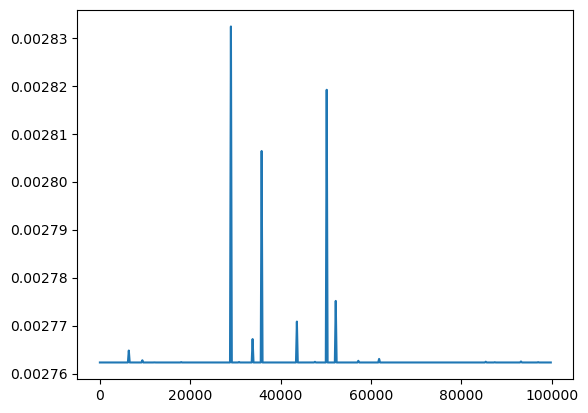

In [1115]:
plt.plot(epoch_list, loss_list)

1499/1499 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.05337036664225371
Root Mean Square Error:  0.041707769910136534


Text(0.5, 1.0, 'SOH real-time prediction')

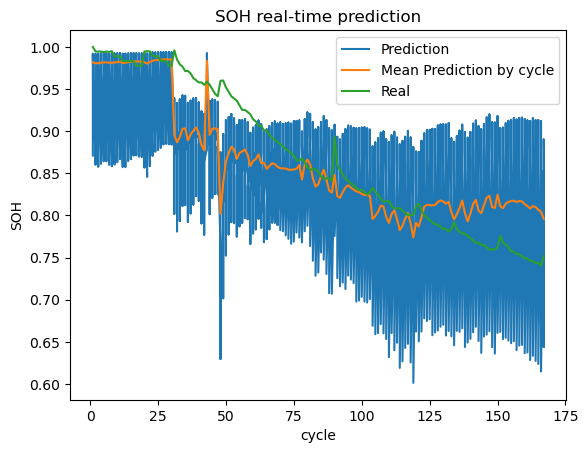

In [1116]:
b7_SOH_predict = model_b7_h4_no.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

In [1117]:
input_layer_b7_h3_no_noo = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h3_no_noo = keras.layers.Dense(10)(input_layer_b7_h3_no_noo)
hidden_layer2_b7_h3_no_noo = keras.layers.Dense(10)(hidden_layer_b7_h3_no_noo)
hidden_layer3_b7_h3_no_noo = keras.layers.Dense(10)(hidden_layer2_b7_h3_no_noo)
output_layer_b7_h3_no_noo = keras.layers.Dense(1)(hidden_layer3_b7_h3_no_noo)
model_b7_h3_no_noo = keras.Model(input_layer_b7_h3_no_noo, output_layer_b7_h3_no_noo)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train_b7_h3_no_noo = custom_train(model_b7_h3_no_noo, optimizer, loss_function, metric)
model_b7_h3_no_noo.summary()

Model: "model_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_43 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_113 (Dense)           (None, 10)                60        
                                                                 
 dense_114 (Dense)           (None, 10)                110       
                                                                 
 dense_115 (Dense)           (None, 10)                110       
                                                                 
 dense_116 (Dense)           (None, 1)                 11        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [1118]:
loss_list, epoch_list = my_train_b7_h3_no_noo.train(b7_train_inputs, b7_train_SOH, 100000, 200, 0.00001)

Training acc over epoch: 0.2493 Training loss (for one batch) at step 0: 0.0748 Time taken: 0.03s 
Training acc over epoch: 0.0704 Training loss (for one batch) at step 200: 0.0067 Time taken: 3.08s 
Training acc over epoch: 0.0606 Training loss (for one batch) at step 400: 0.0048 Time taken: 6.00s 
Training acc over epoch: 0.0516 Training loss (for one batch) at step 600: 0.0037 Time taken: 9.00s 
Training acc over epoch: 0.0461 Training loss (for one batch) at step 800: 0.0033 Time taken: 11.92s 
Training acc over epoch: 0.0435 Training loss (for one batch) at step 1000: 0.0030 Time taken: 15.27s 
Training acc over epoch: 0.0422 Training loss (for one batch) at step 1200: 0.0029 Time taken: 18.21s 
Training acc over epoch: 0.0412 Training loss (for one batch) at step 1400: 0.0029 Time taken: 21.04s 
Training acc over epoch: 0.0404 Training loss (for one batch) at step 1600: 0.0028 Time taken: 23.86s 
Training acc over epoch: 0.0398 Training loss (for one batch) at step 1800: 0.0028 T

Training acc over epoch: 0.0392 Training loss (for one batch) at step 15800: 0.0028 Time taken: 234.79s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 16000: 0.0028 Time taken: 237.78s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 16200: 0.0028 Time taken: 240.77s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 16400: 0.0028 Time taken: 243.73s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 16600: 0.0028 Time taken: 246.60s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 16800: 0.0028 Time taken: 249.49s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 17000: 0.0028 Time taken: 252.43s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 17200: 0.0028 Time taken: 255.49s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 17400: 0.0028 Time taken: 258.41s 
Training acc over epoch: 0.0392 Training loss (for one 

Training acc over epoch: 0.0392 Training loss (for one batch) at step 31600: 0.0028 Time taken: 468.46s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 31800: 0.0028 Time taken: 471.37s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 32000: 0.0028 Time taken: 474.28s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 32200: 0.0028 Time taken: 477.21s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 32400: 0.0028 Time taken: 480.30s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 32600: 0.0028 Time taken: 483.21s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 32800: 0.0028 Time taken: 486.12s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 33000: 0.0028 Time taken: 489.09s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 33200: 0.0028 Time taken: 492.00s 
Training acc over epoch: 0.0392 Training loss (for one 

Training acc over epoch: 0.0392 Training loss (for one batch) at step 47400: 0.0028 Time taken: 703.72s 
Training acc over epoch: 0.0391 Training loss (for one batch) at step 47600: 0.0028 Time taken: 706.63s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 47800: 0.0028 Time taken: 709.54s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 48000: 0.0028 Time taken: 712.42s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 48200: 0.0028 Time taken: 715.40s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 48400: 0.0028 Time taken: 718.40s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 48600: 0.0028 Time taken: 721.37s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 48800: 0.0028 Time taken: 724.28s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 49000: 0.0028 Time taken: 727.20s 
Training acc over epoch: 0.0392 Training loss (for one 

Training acc over epoch: 0.0392 Training loss (for one batch) at step 63200: 0.0028 Time taken: 937.28s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 63400: 0.0028 Time taken: 940.16s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 63600: 0.0028 Time taken: 943.27s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 63800: 0.0028 Time taken: 946.18s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 64000: 0.0028 Time taken: 949.06s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 64200: 0.0028 Time taken: 951.99s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 64400: 0.0028 Time taken: 954.91s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 64600: 0.0028 Time taken: 957.87s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 64800: 0.0028 Time taken: 960.86s 
Training acc over epoch: 0.0392 Training loss (for one 

Training acc over epoch: 0.0392 Training loss (for one batch) at step 78800: 0.0028 Time taken: 1167.27s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 79000: 0.0028 Time taken: 1170.23s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 79200: 0.0028 Time taken: 1173.13s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 79400: 0.0028 Time taken: 1176.01s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 79600: 0.0028 Time taken: 1178.97s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 79800: 0.0028 Time taken: 1182.42s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 80000: 0.0028 Time taken: 1185.49s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 80200: 0.0028 Time taken: 1188.37s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 80400: 0.0028 Time taken: 1191.28s 
Training acc over epoch: 0.0392 Training loss 

Training acc over epoch: 0.0392 Training loss (for one batch) at step 94400: 0.0028 Time taken: 1398.16s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 94600: 0.0028 Time taken: 1401.04s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 94800: 0.0028 Time taken: 1404.01s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 95000: 0.0028 Time taken: 1407.12s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 95200: 0.0028 Time taken: 1410.05s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 95400: 0.0028 Time taken: 1412.97s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 95600: 0.0028 Time taken: 1415.90s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 95800: 0.0028 Time taken: 1418.81s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 96000: 0.0028 Time taken: 1421.78s 
Training acc over epoch: 0.0392 Training loss 

1499/1499 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.05337036513907171
Root Mean Square Error:  0.0417077710657892


Text(0.5, 1.0, 'SOH real-time prediction')

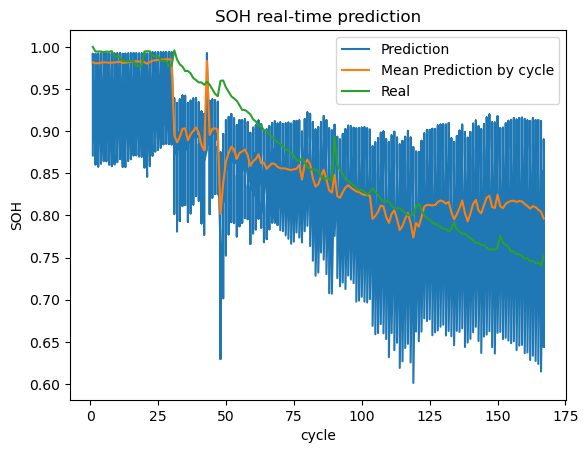

In [1119]:
b7_SOH_predict = model_b7_h3_no_noo.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

In [1123]:
input_layer_b7_h3_mixed1 = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h3_mixed1 = keras.layers.Dense(10, activation='relu')(input_layer_b7_h3_mixed1)
hidden_layer2_b7_h3_mixed1 = keras.layers.Dense(10, activation='relu')(hidden_layer_b7_h3_mixed1)
hidden_layer3_b7_h3_mixed1 = keras.layers.Dense(10, activation='relu')(hidden_layer2_b7_h3_mixed1)
output_layer_b7_h3_mixed1 = keras.layers.Dense(1)(hidden_layer3_b7_h3_mixed1)
model_b7_h3_mixed1 = keras.Model(input_layer_b7_h3_mixed1, output_layer_b7_h3_mixed1)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
model_b7_h3_mixed1.summary()

Model: "model_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_45 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_121 (Dense)           (None, 10)                60        
                                                                 
 dense_122 (Dense)           (None, 10)                110       
                                                                 
 dense_123 (Dense)           (None, 10)                110       
                                                                 
 dense_124 (Dense)           (None, 1)                 11        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [1124]:
my_train_b7_h3_mixed1 = custom_train(model_b7_h3_mixed1, optimizer, loss_function, metric)
loss_list, epoch_list = my_train_b7_h3_mixed1.train(b7_train_inputs, b7_train_SOH, 100000, 200, 0.00001)

Training acc over epoch: 1.1177 Training loss (for one batch) at step 0: 1.2652 Time taken: 0.03s 
Training acc over epoch: 0.0646 Training loss (for one batch) at step 200: 0.0058 Time taken: 3.10s 
Training acc over epoch: 0.0514 Training loss (for one batch) at step 400: 0.0039 Time taken: 5.97s 
Training acc over epoch: 0.0483 Training loss (for one batch) at step 600: 0.0035 Time taken: 8.78s 
Training acc over epoch: 0.0455 Training loss (for one batch) at step 800: 0.0032 Time taken: 11.79s 
Training acc over epoch: 0.0427 Training loss (for one batch) at step 1000: 0.0029 Time taken: 14.62s 
Training acc over epoch: 0.0403 Training loss (for one batch) at step 1200: 0.0026 Time taken: 17.47s 
Training acc over epoch: 0.0385 Training loss (for one batch) at step 1400: 0.0024 Time taken: 20.28s 
Training acc over epoch: 0.0371 Training loss (for one batch) at step 1600: 0.0023 Time taken: 23.15s 
Training acc over epoch: 0.0360 Training loss (for one batch) at step 1800: 0.0022 T

Training acc over epoch: 0.0078 Training loss (for one batch) at step 15800: 0.0002 Time taken: 230.51s 
Training acc over epoch: 0.0078 Training loss (for one batch) at step 16000: 0.0002 Time taken: 233.45s 
Training acc over epoch: 0.0077 Training loss (for one batch) at step 16200: 0.0002 Time taken: 236.61s 
Training acc over epoch: 0.0077 Training loss (for one batch) at step 16400: 0.0002 Time taken: 239.46s 
Training acc over epoch: 0.0077 Training loss (for one batch) at step 16600: 0.0002 Time taken: 242.30s 
Training acc over epoch: 0.0076 Training loss (for one batch) at step 16800: 0.0002 Time taken: 245.14s 
Training acc over epoch: 0.0078 Training loss (for one batch) at step 17000: 0.0002 Time taken: 247.99s 
Training acc over epoch: 0.0077 Training loss (for one batch) at step 17200: 0.0002 Time taken: 250.97s 
Training acc over epoch: 0.0076 Training loss (for one batch) at step 17400: 0.0002 Time taken: 253.91s 
Training acc over epoch: 0.0076 Training loss (for one 

Training acc over epoch: 0.0068 Training loss (for one batch) at step 31600: 0.0001 Time taken: 461.32s 
Training acc over epoch: 0.0069 Training loss (for one batch) at step 31800: 0.0001 Time taken: 464.27s 
Training acc over epoch: 0.0068 Training loss (for one batch) at step 32000: 0.0001 Time taken: 467.20s 
Training acc over epoch: 0.0070 Training loss (for one batch) at step 32200: 0.0001 Time taken: 470.21s 
Training acc over epoch: 0.0069 Training loss (for one batch) at step 32400: 0.0001 Time taken: 473.06s 
Training acc over epoch: 0.0072 Training loss (for one batch) at step 32600: 0.0001 Time taken: 476.06s 
Training acc over epoch: 0.0068 Training loss (for one batch) at step 32800: 0.0001 Time taken: 478.90s 
Training acc over epoch: 0.0079 Training loss (for one batch) at step 33000: 0.0002 Time taken: 481.78s 
Training acc over epoch: 0.0067 Training loss (for one batch) at step 33200: 0.0001 Time taken: 484.69s 
Training acc over epoch: 0.0069 Training loss (for one 

Training acc over epoch: 0.0065 Training loss (for one batch) at step 47400: 0.0001 Time taken: 692.12s 
Training acc over epoch: 0.0065 Training loss (for one batch) at step 47600: 0.0001 Time taken: 695.02s 
Training acc over epoch: 0.0065 Training loss (for one batch) at step 47800: 0.0001 Time taken: 698.08s 
Training acc over epoch: 0.0067 Training loss (for one batch) at step 48000: 0.0001 Time taken: 701.18s 
Training acc over epoch: 0.0065 Training loss (for one batch) at step 48200: 0.0001 Time taken: 704.20s 
Training acc over epoch: 0.0064 Training loss (for one batch) at step 48400: 0.0001 Time taken: 707.07s 
Training acc over epoch: 0.0066 Training loss (for one batch) at step 48600: 0.0001 Time taken: 709.93s 
Training acc over epoch: 0.0064 Training loss (for one batch) at step 48800: 0.0001 Time taken: 712.74s 
Training acc over epoch: 0.0069 Training loss (for one batch) at step 49000: 0.0001 Time taken: 715.89s 
Training acc over epoch: 0.0064 Training loss (for one 

Training acc over epoch: 0.0071 Training loss (for one batch) at step 63200: 0.0001 Time taken: 922.86s 
Training acc over epoch: 0.0063 Training loss (for one batch) at step 63400: 0.0001 Time taken: 925.82s 
Training acc over epoch: 0.0063 Training loss (for one batch) at step 63600: 0.0001 Time taken: 928.83s 
Training acc over epoch: 0.0063 Training loss (for one batch) at step 63800: 0.0001 Time taken: 931.75s 
Training acc over epoch: 0.0063 Training loss (for one batch) at step 64000: 0.0001 Time taken: 934.64s 
Training acc over epoch: 0.0064 Training loss (for one batch) at step 64200: 0.0001 Time taken: 937.53s 
Training acc over epoch: 0.0066 Training loss (for one batch) at step 64400: 0.0001 Time taken: 940.56s 
Training acc over epoch: 0.0063 Training loss (for one batch) at step 64600: 0.0001 Time taken: 943.49s 
Training acc over epoch: 0.0065 Training loss (for one batch) at step 64800: 0.0001 Time taken: 946.31s 
Training acc over epoch: 0.0067 Training loss (for one 

Training acc over epoch: 0.0067 Training loss (for one batch) at step 78800: 0.0001 Time taken: 1156.80s 
Training acc over epoch: 0.0066 Training loss (for one batch) at step 79000: 0.0001 Time taken: 1159.69s 
Training acc over epoch: 0.0064 Training loss (for one batch) at step 79200: 0.0001 Time taken: 1162.69s 
Training acc over epoch: 0.0063 Training loss (for one batch) at step 79400: 0.0001 Time taken: 1165.77s 
Training acc over epoch: 0.0063 Training loss (for one batch) at step 79600: 0.0001 Time taken: 1168.78s 
Training acc over epoch: 0.0063 Training loss (for one batch) at step 79800: 0.0001 Time taken: 1171.80s 
Training acc over epoch: 0.0063 Training loss (for one batch) at step 80000: 0.0001 Time taken: 1174.88s 
Training acc over epoch: 0.0064 Training loss (for one batch) at step 80200: 0.0001 Time taken: 1177.94s 
Training acc over epoch: 0.0063 Training loss (for one batch) at step 80400: 0.0001 Time taken: 1181.03s 
Training acc over epoch: 0.0063 Training loss 

Training acc over epoch: 0.0063 Training loss (for one batch) at step 94400: 0.0001 Time taken: 1389.78s 
Training acc over epoch: 0.0064 Training loss (for one batch) at step 94600: 0.0001 Time taken: 1392.65s 
Training acc over epoch: 0.0063 Training loss (for one batch) at step 94800: 0.0001 Time taken: 1395.66s 
Training acc over epoch: 0.0063 Training loss (for one batch) at step 95000: 0.0001 Time taken: 1398.63s 
Training acc over epoch: 0.0067 Training loss (for one batch) at step 95200: 0.0001 Time taken: 1401.68s 
Training acc over epoch: 0.0063 Training loss (for one batch) at step 95400: 0.0001 Time taken: 1404.84s 
Training acc over epoch: 0.0067 Training loss (for one batch) at step 95600: 0.0001 Time taken: 1407.83s 
Training acc over epoch: 0.0062 Training loss (for one batch) at step 95800: 0.0001 Time taken: 1410.80s 
Training acc over epoch: 0.0062 Training loss (for one batch) at step 96000: 0.0001 Time taken: 1414.00s 
Training acc over epoch: 0.0062 Training loss 

1499/1499 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.12350849751352579
Root Mean Square Error:  0.10856476793880826


Text(0.5, 1.0, 'SOH real-time prediction')

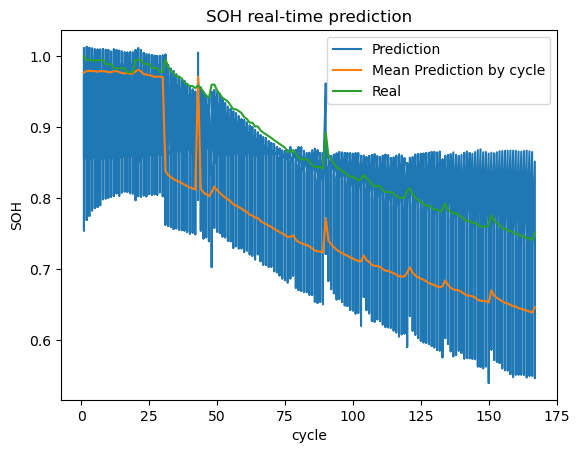

In [1125]:
b7_SOH_predict = model_b7_h3_mixed1.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

In [1127]:
input_layer_b7_h3_mixed2 = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h3_mixed2 = keras.layers.Dense(10)(input_layer_b7_h3_mixed2)
hidden_layer2_b7_h3_mixed2 = keras.layers.Dense(10, activation='tanh')(hidden_layer_b7_h3_mixed2)
hidden_layer3_b7_h3_mixed2 = keras.layers.Dense(10, activation='relu')(hidden_layer2_b7_h3_mixed2)
output_layer_b7_h3_mixed2 = keras.layers.Dense(1)(hidden_layer3_b7_h3_mixed2)
model_b7_h3_mixed2 = keras.Model(input_layer_b7_h3_mixed2, output_layer_b7_h3_mixed2)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
model_b7_h3_mixed2.summary()

Model: "model_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_47 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_129 (Dense)           (None, 10)                60        
                                                                 
 dense_130 (Dense)           (None, 10)                110       
                                                                 
 dense_131 (Dense)           (None, 10)                110       
                                                                 
 dense_132 (Dense)           (None, 1)                 11        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [1130]:
my_train_b7_h3_mixed2 = custom_train(model_b7_h3_mixed2, optimizer, loss_function, metric)
loss_list, epoch_list = my_train_b7_h3_mixed2.train(b7_train_inputs, b7_train_SOH, 100000, 200, 0.00001)

Training acc over epoch: 0.8171 Training loss (for one batch) at step 0: 0.6858 Time taken: 0.03s 
Training acc over epoch: 0.0696 Training loss (for one batch) at step 200: 0.0063 Time taken: 3.04s 
Training acc over epoch: 0.0464 Training loss (for one batch) at step 400: 0.0031 Time taken: 5.96s 
Training acc over epoch: 0.0408 Training loss (for one batch) at step 600: 0.0027 Time taken: 8.93s 
Training acc over epoch: 0.0390 Training loss (for one batch) at step 800: 0.0025 Time taken: 11.83s 
Training acc over epoch: 0.0378 Training loss (for one batch) at step 1000: 0.0024 Time taken: 14.74s 
Training acc over epoch: 0.0362 Training loss (for one batch) at step 1200: 0.0023 Time taken: 17.81s 
Training acc over epoch: 0.0341 Training loss (for one batch) at step 1400: 0.0021 Time taken: 20.83s 
Training acc over epoch: 0.0324 Training loss (for one batch) at step 1600: 0.0019 Time taken: 23.88s 
Training acc over epoch: 0.0310 Training loss (for one batch) at step 1800: 0.0018 T

Training acc over epoch: 0.0084 Training loss (for one batch) at step 15800: 0.0002 Time taken: 236.05s 
Training acc over epoch: 0.0089 Training loss (for one batch) at step 16000: 0.0002 Time taken: 239.03s 
Training acc over epoch: 0.0084 Training loss (for one batch) at step 16200: 0.0002 Time taken: 242.12s 
Training acc over epoch: 0.0091 Training loss (for one batch) at step 16400: 0.0002 Time taken: 245.10s 
Training acc over epoch: 0.0083 Training loss (for one batch) at step 16600: 0.0002 Time taken: 248.28s 
Training acc over epoch: 0.0090 Training loss (for one batch) at step 16800: 0.0002 Time taken: 251.23s 
Training acc over epoch: 0.0083 Training loss (for one batch) at step 17000: 0.0002 Time taken: 254.17s 
Training acc over epoch: 0.0083 Training loss (for one batch) at step 17200: 0.0002 Time taken: 257.14s 
Training acc over epoch: 0.0083 Training loss (for one batch) at step 17400: 0.0002 Time taken: 260.10s 
Training acc over epoch: 0.0089 Training loss (for one 

Training acc over epoch: 0.0074 Training loss (for one batch) at step 31600: 0.0001 Time taken: 472.81s 
Training acc over epoch: 0.0076 Training loss (for one batch) at step 31800: 0.0001 Time taken: 475.76s 
Training acc over epoch: 0.0078 Training loss (for one batch) at step 32000: 0.0001 Time taken: 478.76s 
Training acc over epoch: 0.0074 Training loss (for one batch) at step 32200: 0.0001 Time taken: 481.70s 
Training acc over epoch: 0.0074 Training loss (for one batch) at step 32400: 0.0001 Time taken: 484.68s 
Training acc over epoch: 0.0079 Training loss (for one batch) at step 32600: 0.0001 Time taken: 487.80s 
Training acc over epoch: 0.0104 Training loss (for one batch) at step 32800: 0.0002 Time taken: 490.79s 
Training acc over epoch: 0.0074 Training loss (for one batch) at step 33000: 0.0001 Time taken: 493.81s 
Training acc over epoch: 0.0075 Training loss (for one batch) at step 33200: 0.0001 Time taken: 496.81s 
Training acc over epoch: 0.0074 Training loss (for one 

Training acc over epoch: 0.0073 Training loss (for one batch) at step 47400: 0.0001 Time taken: 710.50s 
Training acc over epoch: 0.0072 Training loss (for one batch) at step 47600: 0.0001 Time taken: 713.71s 
Training acc over epoch: 0.0072 Training loss (for one batch) at step 47800: 0.0001 Time taken: 716.70s 
Training acc over epoch: 0.0102 Training loss (for one batch) at step 48000: 0.0002 Time taken: 719.79s 
Training acc over epoch: 0.0078 Training loss (for one batch) at step 48200: 0.0001 Time taken: 722.75s 
Training acc over epoch: 0.0071 Training loss (for one batch) at step 48400: 0.0001 Time taken: 725.77s 
Training acc over epoch: 0.0101 Training loss (for one batch) at step 48600: 0.0002 Time taken: 728.85s 
Training acc over epoch: 0.0071 Training loss (for one batch) at step 48800: 0.0001 Time taken: 731.85s 
Training acc over epoch: 0.0071 Training loss (for one batch) at step 49000: 0.0001 Time taken: 734.80s 
Training acc over epoch: 0.0071 Training loss (for one 

Training acc over epoch: 0.0074 Training loss (for one batch) at step 63200: 0.0001 Time taken: 948.17s 
Training acc over epoch: 0.0068 Training loss (for one batch) at step 63400: 0.0001 Time taken: 951.76s 
Training acc over epoch: 0.0088 Training loss (for one batch) at step 63600: 0.0002 Time taken: 954.67s 
Training acc over epoch: 0.0068 Training loss (for one batch) at step 63800: 0.0001 Time taken: 957.53s 
Training acc over epoch: 0.0069 Training loss (for one batch) at step 64000: 0.0001 Time taken: 960.48s 
Training acc over epoch: 0.0088 Training loss (for one batch) at step 64200: 0.0002 Time taken: 963.42s 
Training acc over epoch: 0.0069 Training loss (for one batch) at step 64400: 0.0001 Time taken: 966.60s 
Training acc over epoch: 0.0069 Training loss (for one batch) at step 64600: 0.0001 Time taken: 969.58s 
Training acc over epoch: 0.0068 Training loss (for one batch) at step 64800: 0.0001 Time taken: 972.58s 
Training acc over epoch: 0.0068 Training loss (for one 

Training acc over epoch: 0.0066 Training loss (for one batch) at step 78800: 0.0001 Time taken: 1185.81s 
Training acc over epoch: 0.0066 Training loss (for one batch) at step 79000: 0.0001 Time taken: 1188.65s 
Training acc over epoch: 0.0067 Training loss (for one batch) at step 79200: 0.0001 Time taken: 1191.62s 
Training acc over epoch: 0.0066 Training loss (for one batch) at step 79400: 0.0001 Time taken: 1194.47s 
Training acc over epoch: 0.0066 Training loss (for one batch) at step 79600: 0.0001 Time taken: 1197.43s 
Training acc over epoch: 0.0071 Training loss (for one batch) at step 79800: 0.0001 Time taken: 1200.39s 
Training acc over epoch: 0.0073 Training loss (for one batch) at step 80000: 0.0001 Time taken: 1203.35s 
Training acc over epoch: 0.0066 Training loss (for one batch) at step 80200: 0.0001 Time taken: 1206.42s 
Training acc over epoch: 0.0066 Training loss (for one batch) at step 80400: 0.0001 Time taken: 1209.42s 
Training acc over epoch: 0.0066 Training loss 

Training acc over epoch: 0.0063 Training loss (for one batch) at step 94400: 0.0001 Time taken: 1419.14s 
Training acc over epoch: 0.0066 Training loss (for one batch) at step 94600: 0.0001 Time taken: 1422.07s 
Training acc over epoch: 0.0061 Training loss (for one batch) at step 94800: 0.0001 Time taken: 1425.04s 
Training acc over epoch: 0.0062 Training loss (for one batch) at step 95000: 0.0001 Time taken: 1428.12s 
Training acc over epoch: 0.0069 Training loss (for one batch) at step 95200: 0.0001 Time taken: 1431.26s 
Training acc over epoch: 0.0060 Training loss (for one batch) at step 95400: 0.0001 Time taken: 1434.22s 
Training acc over epoch: 0.0060 Training loss (for one batch) at step 95600: 0.0001 Time taken: 1437.15s 
Training acc over epoch: 0.0060 Training loss (for one batch) at step 95800: 0.0001 Time taken: 1440.16s 
Training acc over epoch: 0.0061 Training loss (for one batch) at step 96000: 0.0001 Time taken: 1443.07s 
Training acc over epoch: 0.0062 Training loss 

1499/1499 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.13463409910873694
Root Mean Square Error:  0.12106584508399248


Text(0.5, 1.0, 'SOH real-time prediction')

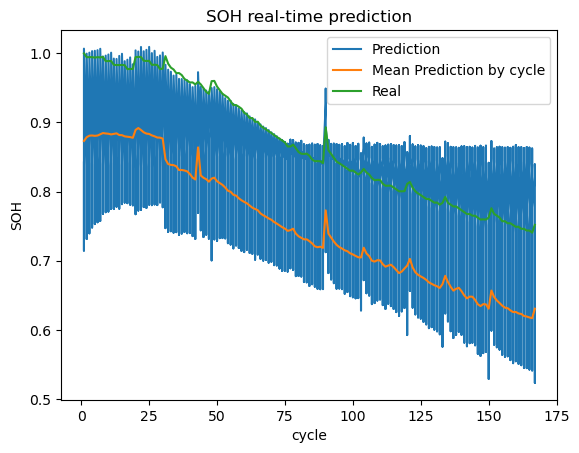

In [1134]:
b7_SOH_predict = model_b7_h3_mixed2.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

In [1136]:
input_layer_b7_h3_mixed3 = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h3_mixed3 = keras.layers.Dense(10)(input_layer_b7_h3_mixed3)
hidden_layer2_b7_h3_mixed3 = keras.layers.Dense(10, activation='tanh')(hidden_layer_b7_h3_mixed3)
#hidden_layer3_b7_h3_mixed3 = keras.layers.Dense(10, activation='relu')(hidden_layer2_b7_h3_mixed3)
hidden_layer3_b7_h3_mixed3 = keras.layers.Dense(10)(hidden_layer2_b7_h3_mixed3)
output_layer_b7_h3_mixed3 = keras.layers.Dense(1)(hidden_layer3_b7_h3_mixed3)
model_b7_h3_mixed3 = keras.Model(input_layer_b7_h3_mixed3, output_layer_b7_h3_mixed3)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
model_b7_h3_mixed3.summary()

Model: "model_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_49 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_137 (Dense)           (None, 10)                60        
                                                                 
 dense_138 (Dense)           (None, 10)                110       
                                                                 
 dense_139 (Dense)           (None, 10)                110       
                                                                 
 dense_140 (Dense)           (None, 1)                 11        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [1137]:
my_train_b7_h3_mixed3 = custom_train(model_b7_h3_mixed3, optimizer, loss_function, metric)
loss_list, epoch_list = my_train_b7_h3_mixed3.train(b7_train_inputs, b7_train_SOH, 100000, 200, 0.0001)

Training acc over epoch: 1.0767 Training loss (for one batch) at step 0: 1.1649 Time taken: 0.03s 
Training acc over epoch: 0.0664 Training loss (for one batch) at step 200: 0.0076 Time taken: 3.12s 
Training acc over epoch: 0.0475 Training loss (for one batch) at step 400: 0.0036 Time taken: 6.05s 
Training acc over epoch: 0.0448 Training loss (for one batch) at step 600: 0.0032 Time taken: 9.17s 
Training acc over epoch: 0.0446 Training loss (for one batch) at step 800: 0.0032 Time taken: 12.22s 
Training acc over epoch: 0.0444 Training loss (for one batch) at step 1000: 0.0032 Time taken: 15.10s 
Training acc over epoch: 0.0443 Training loss (for one batch) at step 1200: 0.0031 Time taken: 17.98s 
Training acc over epoch: 0.0442 Training loss (for one batch) at step 1400: 0.0031 Time taken: 20.76s 
Training acc over epoch: 0.0441 Training loss (for one batch) at step 1600: 0.0031 Time taken: 23.63s 
Training acc over epoch: 0.0439 Training loss (for one batch) at step 1800: 0.0031 T

Training acc over epoch: 0.0100 Training loss (for one batch) at step 15800: 0.0003 Time taken: 235.41s 
Training acc over epoch: 0.0100 Training loss (for one batch) at step 16000: 0.0003 Time taken: 238.39s 
Training acc over epoch: 0.0100 Training loss (for one batch) at step 16200: 0.0003 Time taken: 241.36s 
Training acc over epoch: 0.0100 Training loss (for one batch) at step 16400: 0.0003 Time taken: 244.28s 
Training acc over epoch: 0.0099 Training loss (for one batch) at step 16600: 0.0003 Time taken: 247.18s 
Training acc over epoch: 0.0099 Training loss (for one batch) at step 16800: 0.0003 Time taken: 250.25s 
Training acc over epoch: 0.0099 Training loss (for one batch) at step 17000: 0.0003 Time taken: 253.18s 
Training acc over epoch: 0.0099 Training loss (for one batch) at step 17200: 0.0003 Time taken: 256.11s 
Training acc over epoch: 0.0099 Training loss (for one batch) at step 17400: 0.0003 Time taken: 259.05s 
Training acc over epoch: 0.0098 Training loss (for one 

Training acc over epoch: 0.0091 Training loss (for one batch) at step 31600: 0.0002 Time taken: 469.63s 
Training acc over epoch: 0.0091 Training loss (for one batch) at step 31800: 0.0002 Time taken: 472.57s 
Training acc over epoch: 0.0092 Training loss (for one batch) at step 32000: 0.0002 Time taken: 475.66s 
Training acc over epoch: 0.0091 Training loss (for one batch) at step 32200: 0.0002 Time taken: 478.53s 
Training acc over epoch: 0.0091 Training loss (for one batch) at step 32400: 0.0002 Time taken: 481.46s 
Training acc over epoch: 0.0091 Training loss (for one batch) at step 32600: 0.0002 Time taken: 484.42s 
Training acc over epoch: 0.0093 Training loss (for one batch) at step 32800: 0.0002 Time taken: 487.39s 
Training acc over epoch: 0.0091 Training loss (for one batch) at step 33000: 0.0002 Time taken: 490.51s 
Training acc over epoch: 0.0091 Training loss (for one batch) at step 33200: 0.0002 Time taken: 493.42s 
Training acc over epoch: 0.0091 Training loss (for one 

Training acc over epoch: 0.0089 Training loss (for one batch) at step 47400: 0.0002 Time taken: 703.69s 
Training acc over epoch: 0.0088 Training loss (for one batch) at step 47600: 0.0002 Time taken: 706.59s 
Training acc over epoch: 0.0089 Training loss (for one batch) at step 47800: 0.0002 Time taken: 709.53s 
Training acc over epoch: 0.0089 Training loss (for one batch) at step 48000: 0.0002 Time taken: 712.58s 
Training acc over epoch: 0.0088 Training loss (for one batch) at step 48200: 0.0002 Time taken: 715.63s 
Training acc over epoch: 0.0097 Training loss (for one batch) at step 48400: 0.0003 Time taken: 718.54s 
Training acc over epoch: 0.0104 Training loss (for one batch) at step 48600: 0.0003 Time taken: 721.48s 
Training acc over epoch: 0.0088 Training loss (for one batch) at step 48800: 0.0002 Time taken: 724.37s 
Training acc over epoch: 0.0088 Training loss (for one batch) at step 49000: 0.0002 Time taken: 727.26s 
Training acc over epoch: 0.0089 Training loss (for one 

Training acc over epoch: 0.0087 Training loss (for one batch) at step 63200: 0.0002 Time taken: 938.56s 
Training acc over epoch: 0.0087 Training loss (for one batch) at step 63400: 0.0002 Time taken: 941.38s 
Training acc over epoch: 0.0089 Training loss (for one batch) at step 63600: 0.0002 Time taken: 944.31s 
Training acc over epoch: 0.0087 Training loss (for one batch) at step 63800: 0.0002 Time taken: 947.28s 
Training acc over epoch: 0.0087 Training loss (for one batch) at step 64000: 0.0002 Time taken: 950.20s 
Training acc over epoch: 0.0087 Training loss (for one batch) at step 64200: 0.0002 Time taken: 953.17s 
Training acc over epoch: 0.0087 Training loss (for one batch) at step 64400: 0.0002 Time taken: 956.23s 
Training acc over epoch: 0.0087 Training loss (for one batch) at step 64600: 0.0002 Time taken: 959.16s 
Training acc over epoch: 0.0087 Training loss (for one batch) at step 64800: 0.0002 Time taken: 962.18s 
Training acc over epoch: 0.0087 Training loss (for one 

Training acc over epoch: 0.0086 Training loss (for one batch) at step 78800: 0.0002 Time taken: 1169.66s 
Training acc over epoch: 0.0086 Training loss (for one batch) at step 79000: 0.0002 Time taken: 1172.56s 
Training acc over epoch: 0.0086 Training loss (for one batch) at step 79200: 0.0002 Time taken: 1175.52s 
Training acc over epoch: 0.0106 Training loss (for one batch) at step 79400: 0.0003 Time taken: 1178.57s 
Training acc over epoch: 0.0085 Training loss (for one batch) at step 79600: 0.0002 Time taken: 1181.50s 
Training acc over epoch: 0.0085 Training loss (for one batch) at step 79800: 0.0002 Time taken: 1184.45s 
Training acc over epoch: 0.0085 Training loss (for one batch) at step 80000: 0.0002 Time taken: 1187.38s 
Training acc over epoch: 0.0085 Training loss (for one batch) at step 80200: 0.0002 Time taken: 1190.32s 
Training acc over epoch: 0.0086 Training loss (for one batch) at step 80400: 0.0002 Time taken: 1193.32s 
Training acc over epoch: 0.0088 Training loss 

Training acc over epoch: 0.0078 Training loss (for one batch) at step 94400: 0.0002 Time taken: 1401.40s 
Training acc over epoch: 0.0078 Training loss (for one batch) at step 94600: 0.0002 Time taken: 1404.38s 
Training acc over epoch: 0.0082 Training loss (for one batch) at step 94800: 0.0002 Time taken: 1407.29s 
Training acc over epoch: 0.0077 Training loss (for one batch) at step 95000: 0.0002 Time taken: 1410.29s 
Training acc over epoch: 0.0076 Training loss (for one batch) at step 95200: 0.0002 Time taken: 1413.19s 
Training acc over epoch: 0.0076 Training loss (for one batch) at step 95400: 0.0002 Time taken: 1416.12s 
Training acc over epoch: 0.0075 Training loss (for one batch) at step 95600: 0.0002 Time taken: 1419.19s 
Training acc over epoch: 0.0075 Training loss (for one batch) at step 95800: 0.0002 Time taken: 1422.19s 
Training acc over epoch: 0.0075 Training loss (for one batch) at step 96000: 0.0002 Time taken: 1425.10s 
Training acc over epoch: 0.0079 Training loss 

1499/1499 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.1360043705330126
Root Mean Square Error:  0.12236347410006958


Text(0.5, 1.0, 'SOH real-time prediction')

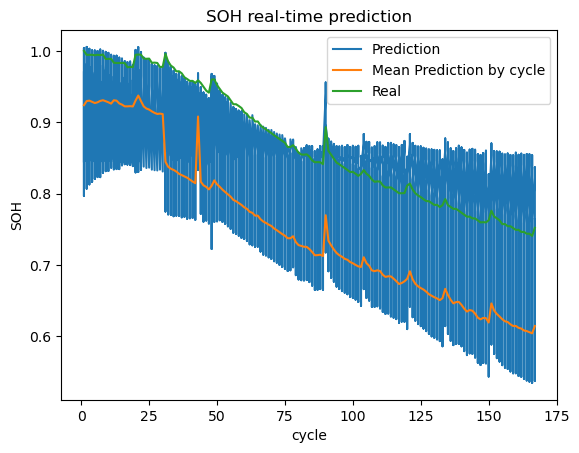

In [1138]:
b7_SOH_predict = model_b7_h3_mixed3.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

In [1140]:
input_layer_b7_h3_mixed4 = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h3_mixed4 = keras.layers.Dense(10)(input_layer_b7_h3_mixed4)
hidden_layer2_b7_h3_mixed4 = keras.layers.Dense(10)(hidden_layer_b7_h3_mixed4)
hidden_layer3_b7_h3_mixed4 = keras.layers.Dense(10, activation='relu')(hidden_layer2_b7_h3_mixed4)
output_layer_b7_h3_mixed4 = keras.layers.Dense(1)(hidden_layer3_b7_h3_mixed4)
model_b7_h3_mixed4 = keras.Model(input_layer_b7_h3_mixed4, output_layer_b7_h3_mixed4)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
model_b7_h3_mixed4.summary()

Model: "model_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_51 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_145 (Dense)           (None, 10)                60        
                                                                 
 dense_146 (Dense)           (None, 10)                110       
                                                                 
 dense_147 (Dense)           (None, 10)                110       
                                                                 
 dense_148 (Dense)           (None, 1)                 11        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [1141]:
my_train_b7_h3_mixed4 = custom_train(model_b7_h3_mixed4, optimizer, loss_function, metric)
loss_list, epoch_list = my_train_b7_h3_mixed4.train(b7_train_inputs, b7_train_SOH, 100000, 200, 0.0001)

Training acc over epoch: 0.5206 Training loss (for one batch) at step 0: 0.2782 Time taken: 0.03s 
Training acc over epoch: 0.0509 Training loss (for one batch) at step 200: 0.0038 Time taken: 3.04s 
Training acc over epoch: 0.0397 Training loss (for one batch) at step 400: 0.0025 Time taken: 5.97s 
Training acc over epoch: 0.0352 Training loss (for one batch) at step 600: 0.0021 Time taken: 8.91s 
Training acc over epoch: 0.0322 Training loss (for one batch) at step 800: 0.0019 Time taken: 11.92s 
Training acc over epoch: 0.0305 Training loss (for one batch) at step 1000: 0.0017 Time taken: 15.02s 
Training acc over epoch: 0.0280 Training loss (for one batch) at step 1200: 0.0015 Time taken: 17.99s 
Training acc over epoch: 0.0240 Training loss (for one batch) at step 1400: 0.0012 Time taken: 20.86s 
Training acc over epoch: 0.0218 Training loss (for one batch) at step 1600: 0.0010 Time taken: 23.73s 
Training acc over epoch: 0.0208 Training loss (for one batch) at step 1800: 0.0010 T

Training acc over epoch: 0.0104 Training loss (for one batch) at step 15800: 0.0003 Time taken: 229.32s 
Training acc over epoch: 0.0107 Training loss (for one batch) at step 16000: 0.0003 Time taken: 232.14s 
Training acc over epoch: 0.0104 Training loss (for one batch) at step 16200: 0.0003 Time taken: 235.11s 
Training acc over epoch: 0.0105 Training loss (for one batch) at step 16400: 0.0003 Time taken: 238.23s 
Training acc over epoch: 0.0104 Training loss (for one batch) at step 16600: 0.0003 Time taken: 241.32s 
Training acc over epoch: 0.0104 Training loss (for one batch) at step 16800: 0.0003 Time taken: 244.29s 
Training acc over epoch: 0.0104 Training loss (for one batch) at step 17000: 0.0003 Time taken: 247.24s 
Training acc over epoch: 0.0104 Training loss (for one batch) at step 17200: 0.0003 Time taken: 250.20s 
Training acc over epoch: 0.0104 Training loss (for one batch) at step 17400: 0.0003 Time taken: 253.32s 
Training acc over epoch: 0.0104 Training loss (for one 

Training acc over epoch: 0.0102 Training loss (for one batch) at step 31600: 0.0002 Time taken: 464.34s 
Training acc over epoch: 0.0107 Training loss (for one batch) at step 31800: 0.0003 Time taken: 467.28s 
Training acc over epoch: 0.0102 Training loss (for one batch) at step 32000: 0.0002 Time taken: 470.24s 
Training acc over epoch: 0.0102 Training loss (for one batch) at step 32200: 0.0002 Time taken: 473.21s 
Training acc over epoch: 0.0102 Training loss (for one batch) at step 32400: 0.0002 Time taken: 476.23s 
Training acc over epoch: 0.0102 Training loss (for one batch) at step 32600: 0.0002 Time taken: 479.24s 
Training acc over epoch: 0.0102 Training loss (for one batch) at step 32800: 0.0002 Time taken: 482.16s 
Training acc over epoch: 0.0102 Training loss (for one batch) at step 33000: 0.0002 Time taken: 485.06s 
Training acc over epoch: 0.0114 Training loss (for one batch) at step 33200: 0.0003 Time taken: 487.98s 
Training acc over epoch: 0.0102 Training loss (for one 

Training acc over epoch: 0.0101 Training loss (for one batch) at step 47400: 0.0002 Time taken: 698.29s 
Training acc over epoch: 0.0111 Training loss (for one batch) at step 47600: 0.0003 Time taken: 701.31s 
Training acc over epoch: 0.0101 Training loss (for one batch) at step 47800: 0.0002 Time taken: 704.25s 
Training acc over epoch: 0.0104 Training loss (for one batch) at step 48000: 0.0002 Time taken: 707.08s 
Training acc over epoch: 0.0101 Training loss (for one batch) at step 48200: 0.0002 Time taken: 709.95s 
Training acc over epoch: 0.0101 Training loss (for one batch) at step 48400: 0.0002 Time taken: 712.91s 
Training acc over epoch: 0.0101 Training loss (for one batch) at step 48600: 0.0002 Time taken: 715.90s 
Training acc over epoch: 0.0101 Training loss (for one batch) at step 48800: 0.0002 Time taken: 718.76s 
Training acc over epoch: 0.0106 Training loss (for one batch) at step 49000: 0.0002 Time taken: 721.59s 
Training acc over epoch: 0.0101 Training loss (for one 

Training acc over epoch: 0.0101 Training loss (for one batch) at step 63200: 0.0002 Time taken: 928.43s 
Training acc over epoch: 0.0100 Training loss (for one batch) at step 63400: 0.0002 Time taken: 931.42s 
Training acc over epoch: 0.0104 Training loss (for one batch) at step 63600: 0.0002 Time taken: 934.44s 
Training acc over epoch: 0.0101 Training loss (for one batch) at step 63800: 0.0002 Time taken: 937.29s 
Training acc over epoch: 0.0104 Training loss (for one batch) at step 64000: 0.0002 Time taken: 940.39s 
Training acc over epoch: 0.0101 Training loss (for one batch) at step 64200: 0.0002 Time taken: 943.36s 
Training acc over epoch: 0.0100 Training loss (for one batch) at step 64400: 0.0002 Time taken: 946.22s 
Training acc over epoch: 0.0100 Training loss (for one batch) at step 64600: 0.0002 Time taken: 948.99s 
Training acc over epoch: 0.0103 Training loss (for one batch) at step 64800: 0.0002 Time taken: 951.82s 
Training acc over epoch: 0.0100 Training loss (for one 

Training acc over epoch: 0.0100 Training loss (for one batch) at step 78800: 0.0002 Time taken: 1158.99s 
Training acc over epoch: 0.0100 Training loss (for one batch) at step 79000: 0.0002 Time taken: 1161.97s 
Training acc over epoch: 0.0100 Training loss (for one batch) at step 79200: 0.0002 Time taken: 1165.05s 
Training acc over epoch: 0.0100 Training loss (for one batch) at step 79400: 0.0002 Time taken: 1167.98s 
Training acc over epoch: 0.0100 Training loss (for one batch) at step 79600: 0.0002 Time taken: 1170.89s 
Training acc over epoch: 0.0100 Training loss (for one batch) at step 79800: 0.0002 Time taken: 1173.79s 
Training acc over epoch: 0.0101 Training loss (for one batch) at step 80000: 0.0002 Time taken: 1176.67s 
Training acc over epoch: 0.0100 Training loss (for one batch) at step 80200: 0.0002 Time taken: 1179.67s 
Training acc over epoch: 0.0100 Training loss (for one batch) at step 80400: 0.0002 Time taken: 1182.68s 
Training acc over epoch: 0.0100 Training loss 

Training acc over epoch: 0.0100 Training loss (for one batch) at step 94400: 0.0002 Time taken: 1390.87s 
Training acc over epoch: 0.0106 Training loss (for one batch) at step 94600: 0.0003 Time taken: 1393.87s 
Training acc over epoch: 0.0099 Training loss (for one batch) at step 94800: 0.0002 Time taken: 1396.79s 
Training acc over epoch: 0.0100 Training loss (for one batch) at step 95000: 0.0002 Time taken: 1399.71s 
Training acc over epoch: 0.0100 Training loss (for one batch) at step 95200: 0.0002 Time taken: 1402.60s 
Training acc over epoch: 0.0099 Training loss (for one batch) at step 95400: 0.0002 Time taken: 1405.70s 
Training acc over epoch: 0.0100 Training loss (for one batch) at step 95600: 0.0002 Time taken: 1408.61s 
Training acc over epoch: 0.0100 Training loss (for one batch) at step 95800: 0.0002 Time taken: 1411.53s 
Training acc over epoch: 0.0100 Training loss (for one batch) at step 96000: 0.0002 Time taken: 1414.46s 
Training acc over epoch: 0.0105 Training loss 

1499/1499 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.1298418770843318
Root Mean Square Error:  0.10567231885636033


Text(0.5, 1.0, 'SOH real-time prediction')

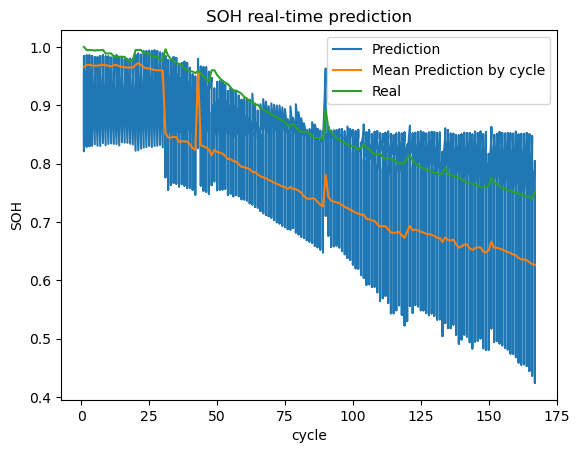

In [1142]:
b7_SOH_predict = model_b7_h3_mixed4.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

In [1150]:
input_layer_b7_h3_mixed5 = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h3_mixed5 = keras.layers.Dense(10, use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(input_layer_b7_h3_mixed5)
hidden_layer2_b7_h3_mixed5 = keras.layers.Dense(10, activation='tanh', use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(hidden_layer_b7_h3_mixed5)
hidden_layer3_b7_h3_mixed5 = keras.layers.Dense(10, activation='relu', use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(hidden_layer2_b7_h3_mixed5)
output_layer_b7_h3_mixed5 = keras.layers.Dense(1, use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(hidden_layer3_b7_h3_mixed5)
model_b7_h3_mixed5 = keras.Model(input_layer_b7_h3_mixed5, output_layer_b7_h3_mixed5)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
model_b7_h3_mixed5.summary()

Model: "model_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_55 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_161 (Dense)           (None, 10)                60        
                                                                 
 dense_162 (Dense)           (None, 10)                110       
                                                                 
 dense_163 (Dense)           (None, 10)                110       
                                                                 
 dense_164 (Dense)           (None, 1)                 11        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [1153]:
my_train_b7_h3_mixed5 = custom_train(model_b7_h3_mixed5, optimizer, loss_function, metric)
loss_list, epoch_list = my_train_b7_h3_mixed5.train(b7_train_inputs, b7_train_SOH, 100000, 200, 0.0001)

Training acc over epoch: 0.0398 Training loss (for one batch) at step 0: 0.0027 Time taken: 0.02s 
Training acc over epoch: 0.0392 Training loss (for one batch) at step 200: 0.0027 Time taken: 3.22s 
Training acc over epoch: 0.0389 Training loss (for one batch) at step 400: 0.0027 Time taken: 6.09s 
Training acc over epoch: 0.0387 Training loss (for one batch) at step 600: 0.0027 Time taken: 9.01s 
Training acc over epoch: 0.0385 Training loss (for one batch) at step 800: 0.0027 Time taken: 11.86s 
Training acc over epoch: 0.0385 Training loss (for one batch) at step 1000: 0.0026 Time taken: 14.75s 
Training acc over epoch: 0.0384 Training loss (for one batch) at step 1200: 0.0026 Time taken: 17.75s 
Training acc over epoch: 0.0384 Training loss (for one batch) at step 1400: 0.0026 Time taken: 20.86s 
Training acc over epoch: 0.0384 Training loss (for one batch) at step 1600: 0.0026 Time taken: 23.85s 
Training acc over epoch: 0.0385 Training loss (for one batch) at step 1800: 0.0026 T

Training acc over epoch: 0.0091 Training loss (for one batch) at step 15800: 0.0003 Time taken: 235.41s 
Training acc over epoch: 0.0090 Training loss (for one batch) at step 16000: 0.0002 Time taken: 238.23s 
Training acc over epoch: 0.0090 Training loss (for one batch) at step 16200: 0.0002 Time taken: 241.22s 
Training acc over epoch: 0.0090 Training loss (for one batch) at step 16400: 0.0002 Time taken: 244.40s 
Training acc over epoch: 0.0090 Training loss (for one batch) at step 16600: 0.0002 Time taken: 247.43s 
Training acc over epoch: 0.0090 Training loss (for one batch) at step 16800: 0.0002 Time taken: 250.44s 
Training acc over epoch: 0.0089 Training loss (for one batch) at step 17000: 0.0002 Time taken: 253.44s 
Training acc over epoch: 0.0089 Training loss (for one batch) at step 17200: 0.0002 Time taken: 256.48s 
Training acc over epoch: 0.0089 Training loss (for one batch) at step 17400: 0.0002 Time taken: 259.70s 
Training acc over epoch: 0.0122 Training loss (for one 

Training acc over epoch: 0.0066 Training loss (for one batch) at step 31600: 0.0002 Time taken: 474.26s 
Training acc over epoch: 0.0066 Training loss (for one batch) at step 31800: 0.0002 Time taken: 477.09s 
Training acc over epoch: 0.0066 Training loss (for one batch) at step 32000: 0.0002 Time taken: 479.89s 
Training acc over epoch: 0.0066 Training loss (for one batch) at step 32200: 0.0002 Time taken: 482.82s 
Training acc over epoch: 0.0066 Training loss (for one batch) at step 32400: 0.0002 Time taken: 485.70s 
Training acc over epoch: 0.0066 Training loss (for one batch) at step 32600: 0.0002 Time taken: 488.59s 
Training acc over epoch: 0.0065 Training loss (for one batch) at step 32800: 0.0002 Time taken: 491.44s 
Training acc over epoch: 0.0065 Training loss (for one batch) at step 33000: 0.0002 Time taken: 494.30s 
Training acc over epoch: 0.0065 Training loss (for one batch) at step 33200: 0.0002 Time taken: 497.46s 
Training acc over epoch: 0.0065 Training loss (for one 

Training acc over epoch: 0.0059 Training loss (for one batch) at step 47400: 0.0001 Time taken: 711.47s 
Training acc over epoch: 0.0059 Training loss (for one batch) at step 47600: 0.0001 Time taken: 714.33s 
Training acc over epoch: 0.0059 Training loss (for one batch) at step 47800: 0.0001 Time taken: 717.24s 
Training acc over epoch: 0.0063 Training loss (for one batch) at step 48000: 0.0001 Time taken: 720.30s 
Training acc over epoch: 0.0059 Training loss (for one batch) at step 48200: 0.0001 Time taken: 723.59s 
Training acc over epoch: 0.0059 Training loss (for one batch) at step 48400: 0.0001 Time taken: 726.72s 
Training acc over epoch: 0.0059 Training loss (for one batch) at step 48600: 0.0001 Time taken: 729.72s 
Training acc over epoch: 0.0058 Training loss (for one batch) at step 48800: 0.0001 Time taken: 732.65s 
Training acc over epoch: 0.0102 Training loss (for one batch) at step 49000: 0.0002 Time taken: 735.49s 
Training acc over epoch: 0.0059 Training loss (for one 

Training acc over epoch: 0.0057 Training loss (for one batch) at step 63200: 0.0001 Time taken: 944.76s 
Training acc over epoch: 0.0056 Training loss (for one batch) at step 63400: 0.0001 Time taken: 947.93s 
Training acc over epoch: 0.0057 Training loss (for one batch) at step 63600: 0.0001 Time taken: 950.87s 
Training acc over epoch: 0.0057 Training loss (for one batch) at step 63800: 0.0001 Time taken: 953.87s 
Training acc over epoch: 0.0056 Training loss (for one batch) at step 64000: 0.0001 Time taken: 956.86s 
Training acc over epoch: 0.0096 Training loss (for one batch) at step 64200: 0.0002 Time taken: 959.80s 
Training acc over epoch: 0.0057 Training loss (for one batch) at step 64400: 0.0001 Time taken: 962.87s 
Training acc over epoch: 0.0057 Training loss (for one batch) at step 64600: 0.0001 Time taken: 965.90s 
Training acc over epoch: 0.0056 Training loss (for one batch) at step 64800: 0.0001 Time taken: 968.87s 
Training acc over epoch: 0.0056 Training loss (for one 

Training acc over epoch: 0.0055 Training loss (for one batch) at step 78800: 0.0001 Time taken: 1177.34s 
Training acc over epoch: 0.0055 Training loss (for one batch) at step 79000: 0.0001 Time taken: 1180.32s 
Training acc over epoch: 0.0055 Training loss (for one batch) at step 79200: 0.0001 Time taken: 1183.38s 
Training acc over epoch: 0.0055 Training loss (for one batch) at step 79400: 0.0001 Time taken: 1186.42s 
Training acc over epoch: 0.0055 Training loss (for one batch) at step 79600: 0.0001 Time taken: 1189.48s 
Training acc over epoch: 0.0075 Training loss (for one batch) at step 79800: 0.0001 Time taken: 1192.43s 
Training acc over epoch: 0.0055 Training loss (for one batch) at step 80000: 0.0001 Time taken: 1195.41s 
Training acc over epoch: 0.0055 Training loss (for one batch) at step 80200: 0.0001 Time taken: 1198.28s 
Training acc over epoch: 0.0055 Training loss (for one batch) at step 80400: 0.0001 Time taken: 1201.12s 
Training acc over epoch: 0.0055 Training loss 

Training acc over epoch: 0.0054 Training loss (for one batch) at step 94400: 0.0001 Time taken: 1410.65s 
Training acc over epoch: 0.0054 Training loss (for one batch) at step 94600: 0.0001 Time taken: 1413.76s 
Training acc over epoch: 0.0054 Training loss (for one batch) at step 94800: 0.0001 Time taken: 1416.74s 
Training acc over epoch: 0.0054 Training loss (for one batch) at step 95000: 0.0001 Time taken: 1419.70s 
Training acc over epoch: 0.0054 Training loss (for one batch) at step 95200: 0.0001 Time taken: 1422.64s 
Training acc over epoch: 0.0059 Training loss (for one batch) at step 95400: 0.0001 Time taken: 1425.61s 
Training acc over epoch: 0.0054 Training loss (for one batch) at step 95600: 0.0001 Time taken: 1428.70s 
Training acc over epoch: 0.0054 Training loss (for one batch) at step 95800: 0.0001 Time taken: 1431.68s 
Training acc over epoch: 0.0054 Training loss (for one batch) at step 96000: 0.0001 Time taken: 1434.63s 
Training acc over epoch: 0.0054 Training loss 

1499/1499 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.1438477803184207
Root Mean Square Error:  0.13368848529986507


Text(0.5, 1.0, 'SOH real-time prediction')

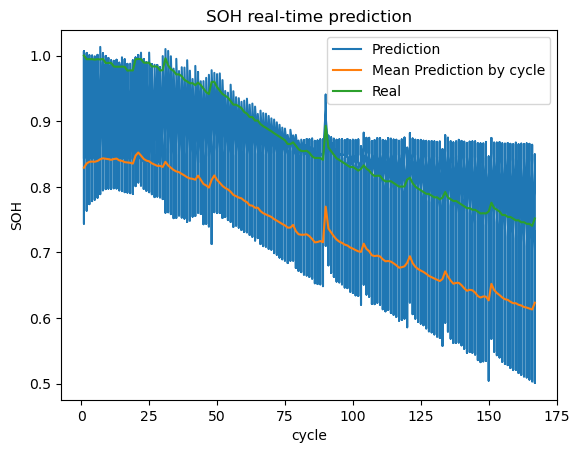

In [1154]:
b7_SOH_predict = model_b7_h3_mixed5.predict(b7_validation_inputs)

b7_SOH_validation = b7_inputs.loc[(b7_inputs['cycle'] >= 1), ['cycle']]
b7_SOH_validation['SOH_predict'] = b7_SOH_predict
b7_SOH_validation['SOH_target'] = b7_SOH_target.to_numpy()
b7_SOH_validation
rms = np.sqrt(mean_squared_error(b7_SOH_validation['SOH_predict'], b7_SOH_validation['SOH_target']))
print('Root Mean Square Error: ', rms)

b7_SOH_validation_mean = b7_SOH_validation.groupby(['cycle']).mean().reset_index()
rms = np.sqrt(mean_squared_error(b7_SOH_validation_mean['SOH_predict'], b7_SOH_validation_mean['SOH_target']))
print('Root Mean Square Error: ', rms)


plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_predict'])
plt.plot(b7_SOH_validation_mean['cycle'], b7_SOH_validation_mean['SOH_predict'])
plt.plot(b7_SOH_validation['cycle'], b7_SOH_validation['SOH_target'])

plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
plt.title('SOH real-time prediction')

In [1159]:
def custom_validation(model, SOH_target, validation_inputs, inputs):
    SOH_predict = model.predict(validation_inputs)

    SOH_validation = inputs.loc[(inputs['cycle'] >= 1), ['cycle']]
    SOH_validation['SOH_predict'] = SOH_predict
    SOH_validation['SOH_target'] = SOH_target.to_numpy()
    
    rms = np.sqrt(mean_squared_error(SOH_validation['SOH_predict'], SOH_validation['SOH_target']))
    print('Root Mean Square Error: ', rms)

    SOH_validation_mean = SOH_validation.groupby(['cycle']).mean().reset_index()
    rms = np.sqrt(mean_squared_error(SOH_validation_mean['SOH_predict'], SOH_validation_mean['SOH_target']))
    print('Root Mean Square Error: ', rms)


    plt.plot(SOH_validation['cycle'], SOH_validation['SOH_predict'])
    plt.plot(SOH_validation_mean['cycle'], SOH_validation_mean['SOH_predict'])
    plt.plot(SOH_validation['cycle'], SOH_validation['SOH_target'])

    plt.xlabel("cycle")
    plt.ylabel("SOH")
    plt.legend(['Prediction', 'Mean Prediction by cycle', 'Real'])
    plt.title('SOH real-time prediction')

1385/1385 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.08745470194121677
Root Mean Square Error:  0.06487952856447952


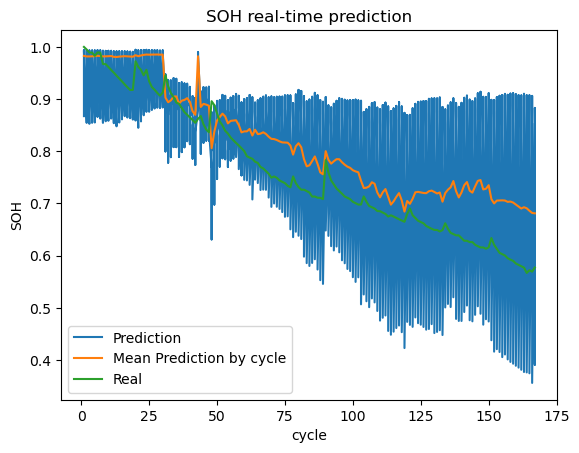

In [1167]:
custom_validation(model_b7_h3_mixed5, b6_SOH_target, b6_validation_inputs, b6_inputs)

In [1168]:
input_layer_b7_h3_mixed6 = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h3_mixed6 = keras.layers.Dense(20, use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(input_layer_b7_h3_mixed6)
hidden_layer2_b7_h3_mixed6 = keras.layers.Dense(20, activation='tanh', use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(hidden_layer_b7_h3_mixed6)
hidden_layer3_b7_h3_mixed6 = keras.layers.Dense(20, activation='relu', use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(hidden_layer2_b7_h3_mixed6)
output_layer_b7_h3_mixed6 = keras.layers.Dense(1, use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(hidden_layer3_b7_h3_mixed6)
model_b7_h3_mixed6 = keras.Model(input_layer_b7_h3_mixed6, output_layer_b7_h3_mixed6)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
model_b7_h3_mixed6.summary()

Model: "model_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_56 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_165 (Dense)           (None, 20)                120       
                                                                 
 dense_166 (Dense)           (None, 20)                420       
                                                                 
 dense_167 (Dense)           (None, 20)                420       
                                                                 
 dense_168 (Dense)           (None, 1)                 21        
                                                                 
Total params: 981
Trainable params: 981
Non-trainable params: 0
_________________________________________________________________


In [1187]:
my_train_b7_h3_mixed6 = custom_train(model_b7_h3_mixed6, optimizer, loss_function, metric)
loss_list, epoch_list = my_train_b7_h3_mixed6.train(b7_train_inputs, b7_train_SOH, 10000, 200, 0.001)

Training acc over epoch: 0.0221 Training loss (for one batch) at step 0: 0.0010 Time taken: 0.02s 
Training acc over epoch: 0.0188 Training loss (for one batch) at step 200: 0.0008 Time taken: 2.98s 
Training acc over epoch: 0.0169 Training loss (for one batch) at step 400: 0.0006 Time taken: 5.90s 
Training acc over epoch: 0.0157 Training loss (for one batch) at step 600: 0.0005 Time taken: 8.70s 


1385/1385 [==============================] - 1s 976us/step
Root Mean Square Error:  0.19634151458146057
Root Mean Square Error:  0.1810498213091659


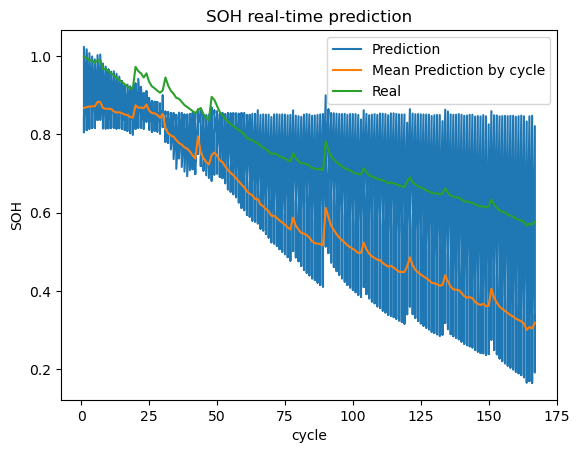

In [1188]:
custom_validation(model_b7_h3_mixed6, b6_SOH_target, b6_validation_inputs, b6_inputs)

In [1190]:
input_layer_b7_h3_mixed7 = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h3_mixed7 = keras.layers.Dense(20, activation='tanh', use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(input_layer_b7_h3_mixed7)
hidden_layer2_b7_h3_mixed7 = keras.layers.Dense(20, use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(hidden_layer_b7_h3_mixed7)
hidden_layer3_b7_h3_mixed7 = keras.layers.Dense(20, activation='relu', use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(hidden_layer2_b7_h3_mixed7)
output_layer_b7_h3_mixed7 = keras.layers.Dense(1, use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(hidden_layer3_b7_h3_mixed7)
model_b7_h3_mixed7 = keras.Model(input_layer_b7_h3_mixed7, output_layer_b7_h3_mixed7)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
model_b7_h3_mixed7.summary()

Model: "model_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_58 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_173 (Dense)           (None, 20)                120       
                                                                 
 dense_174 (Dense)           (None, 20)                420       
                                                                 
 dense_175 (Dense)           (None, 20)                420       
                                                                 
 dense_176 (Dense)           (None, 1)                 21        
                                                                 
Total params: 981
Trainable params: 981
Non-trainable params: 0
_________________________________________________________________


In [1193]:
my_train_b7_h3_mixed7 = custom_train(model_b7_h3_mixed7, optimizer, loss_function, metric)
loss_list, epoch_list = my_train_b7_h3_mixed7.train(b7_train_inputs, b7_train_SOH, 10000, 200, 0.0005)

Training acc over epoch: 0.0224 Training loss (for one batch) at step 0: 0.0010 Time taken: 0.02s 
Training acc over epoch: 0.0208 Training loss (for one batch) at step 200: 0.0009 Time taken: 3.19s 
Training acc over epoch: 0.0197 Training loss (for one batch) at step 400: 0.0008 Time taken: 5.99s 
Training acc over epoch: 0.0180 Training loss (for one batch) at step 600: 0.0007 Time taken: 8.81s 
Training acc over epoch: 0.0171 Training loss (for one batch) at step 800: 0.0006 Time taken: 11.62s 
Training acc over epoch: 0.0164 Training loss (for one batch) at step 1000: 0.0006 Time taken: 14.46s 
Training acc over epoch: 0.0160 Training loss (for one batch) at step 1200: 0.0005 Time taken: 17.53s 
Training acc over epoch: 0.0160 Training loss (for one batch) at step 1400: 0.0005 Time taken: 20.46s 


1385/1385 [==============================] - 1s 968us/step
Root Mean Square Error:  0.1816187203901278
Root Mean Square Error:  0.1684723005204981


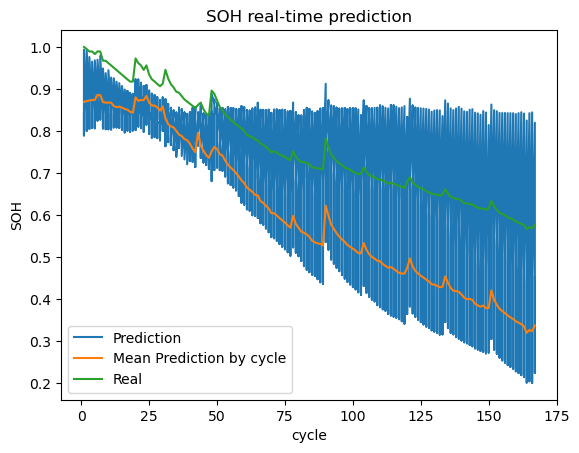

In [1194]:
custom_validation(model_b7_h3_mixed7, b6_SOH_target, b6_validation_inputs, b6_inputs)

In [1207]:
input_layer_b7_h3_mixed8 = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h3_mixed8 = keras.layers.Dense(20, activation='tanh', use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(input_layer_b7_h3_mixed8)
hidden_layer2_b7_h3_mixed8 = keras.layers.Dense(20, use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(hidden_layer_b7_h3_mixed8)
hidden_layer3_b7_h3_mixed8 = keras.layers.Dense(20, activation='relu', use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(hidden_layer2_b7_h3_mixed8)
output_layer_b7_h3_mixed8 = keras.layers.Dense(1, use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(hidden_layer3_b7_h3_mixed8)
model_b7_h3_mixed8 = keras.Model(input_layer_b7_h3_mixed8, output_layer_b7_h3_mixed8)
#optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
optimizer = tf.keras.optimizers.Adam(epsilon=1e-08)
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
model_b7_h3_mixed8.summary()

Model: "model_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_64 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_197 (Dense)           (None, 20)                120       
                                                                 
 dense_198 (Dense)           (None, 20)                420       
                                                                 
 dense_199 (Dense)           (None, 20)                420       
                                                                 
 dense_200 (Dense)           (None, 1)                 21        
                                                                 
Total params: 981
Trainable params: 981
Non-trainable params: 0
_________________________________________________________________


In [1224]:
my_train_b7_h3_mixed8 = custom_train(model_b7_h3_mixed8, optimizer, loss_function, metric)
loss_list, epoch_list = my_train_b7_h3_mixed8.train(b7_train_inputs, b7_train_SOH, 1000, 200, 0.0005)

Training acc over epoch: 0.0222 Training loss (for one batch) at step 0: 0.0010 Time taken: 0.02s 
Training acc over epoch: 0.0210 Training loss (for one batch) at step 200: 0.0009 Time taken: 3.00s 
Training acc over epoch: 0.0198 Training loss (for one batch) at step 400: 0.0008 Time taken: 5.85s 
Training acc over epoch: 0.0187 Training loss (for one batch) at step 600: 0.0007 Time taken: 8.71s 
Training acc over epoch: 0.0178 Training loss (for one batch) at step 800: 0.0007 Time taken: 11.62s 


1385/1385 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.07700760856516366
Root Mean Square Error:  0.06644274087266523


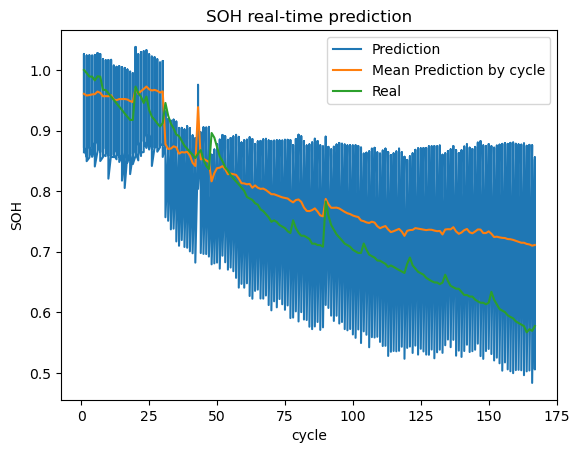

In [1211]:
custom_validation(model_b7_h3_mixed8, b6_SOH_target, b6_validation_inputs, b6_inputs)

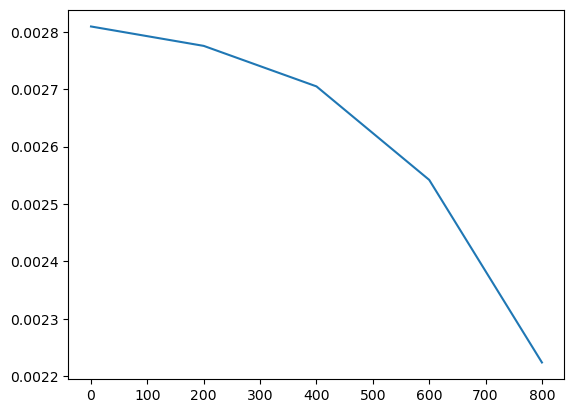

In [1219]:
plt.plot(epoch_list, loss_list)

1385/1385 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.06618757223233214
Root Mean Square Error:  0.04028234882246445


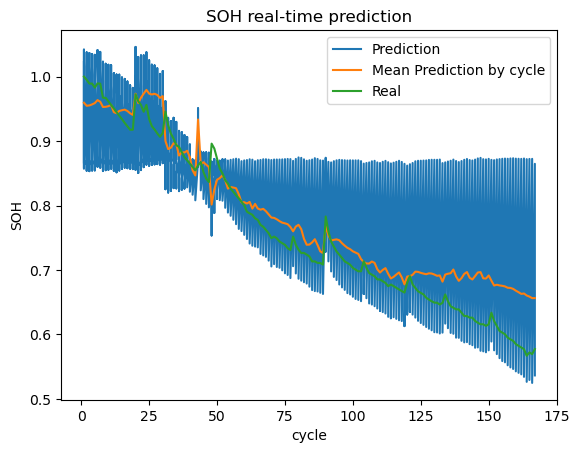

In [1217]:
custom_validation(model_b7_h3_mixed8, b6_SOH_target, b6_validation_inputs, b6_inputs)

1385/1385 [==============================] - 2s 1ms/step
Root Mean Square Error:  0.15341556388856506
Root Mean Square Error:  0.1383621951356619


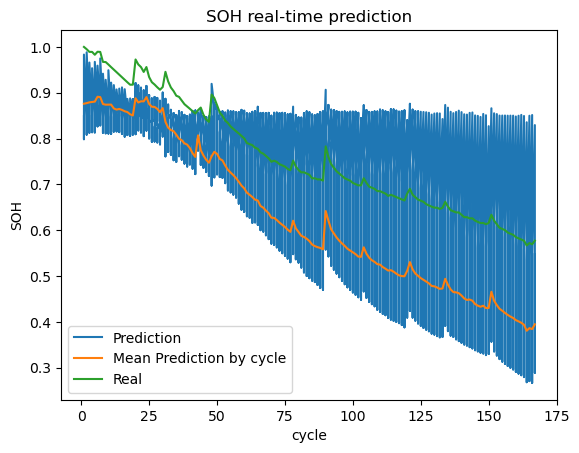

In [1225]:
custom_validation(model_b7_h3_mixed8, b6_SOH_target, b6_validation_inputs, b6_inputs)

In [ ]:
class model_factory:
    
    def __init__(self, optimizer_fn, loss_fn, metric_fn):
        self.model
        self.train
        self.optimizer = optimizer_fn
        self.loss_fn = loss_fn
        self.metrics = metric_fn
        self.train = custom_train(model_b7_h3_mixed5, optimizer, loss_function, metric)
        
        input_layer_b7_h3_mixed5 = keras.Input(shape=(b5_train_inputs.shape[1],))
hidden_layer_b7_h3_mixed5 = keras.layers.Dense(10, use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(input_layer_b7_h3_mixed5)
hidden_layer2_b7_h3_mixed5 = keras.layers.Dense(10, activation='tanh', use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(hidden_layer_b7_h3_mixed5)
hidden_layer3_b7_h3_mixed5 = keras.layers.Dense(10, activation='relu', use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(hidden_layer2_b7_h3_mixed5)
output_layer_b7_h3_mixed5 = keras.layers.Dense(1, use_bias = True, kernel_initializer = 'random_normal', bias_initializer = 'zeros')(hidden_layer3_b7_h3_mixed5)
model_b7_h3_mixed5 = keras.Model(input_layer_b7_h3_mixed5, output_layer_b7_h3_mixed5)
optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
model_b7_h3_mixed5.summary()

In [1023]:
#model = Sequential()
#model.add(Dense(8, activation='relu', input_dim=train_dataset.shape[1]))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(8, activation='relu'))a
#model.add(Dropout(rate=0.25))
#model.add(Dense(1))
model.summary()
model.compile(optimizer=Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss='mean_absolute_error')

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_50 (Dense)            (None, 10)                60        
                                                                 
 dense_51 (Dense)            (None, 1)                 11        
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


NameError: name 'Adam' is not defined

In [1024]:
loss_list, epoch_list = my_train.train(b5_train_inputs, b5_train_SOH, 2000, 200, 0.001)

Training acc over epoch: 0.0860 Training loss (for one batch) at step 0: 0.0159 Time taken: 0.01s 
Training acc over epoch: 0.0853 Training loss (for one batch) at step 200: 0.0157 Time taken: 2.84s 
Training acc over epoch: 0.0846 Training loss (for one batch) at step 400: 0.0155 Time taken: 5.53s 
Training acc over epoch: 0.0840 Training loss (for one batch) at step 600: 0.0153 Time taken: 8.10s 
Training acc over epoch: 0.0835 Training loss (for one batch) at step 800: 0.0151 Time taken: 10.62s 
Training acc over epoch: 0.0831 Training loss (for one batch) at step 1000: 0.0150 Time taken: 13.04s 
Training acc over epoch: 0.0828 Training loss (for one batch) at step 1200: 0.0148 Time taken: 15.50s 
Training acc over epoch: 0.0824 Training loss (for one batch) at step 1400: 0.0147 Time taken: 17.93s 
Training acc over epoch: 0.0820 Training loss (for one batch) at step 1600: 0.0145 Time taken: 20.41s 
Training acc over epoch: 0.0817 Training loss (for one batch) at step 1800: 0.0144 T

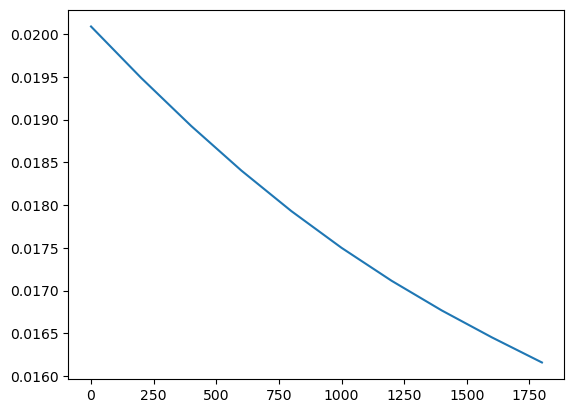

In [1006]:
plt.plot(epoch_list, loss_list)

In [ ]:
dis_ele['SoH']=(dis_ele['capacity'])/C

def load_data(battery):
  mat = loadmat('nasa_data/' + battery + '.mat')
  print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
  counter = 0
  dataset = []
  capacity_data = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'discharge':
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_load'][0][j]
        voltage_load = data[0][0]['Voltage_load'][0][j]
        time = data[0][0]['Time'][0][j]
        dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
      capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
      counter = counter + 1
  print(dataset[0])
  return [pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity'])]


In [65]:
attrib=['cycle', 'datetime', 'capacity']
capacity

cycle  ambient_temperature            datetime  capacity
0        1                   24 2008-04-02 15:25:41  1.856487
1        2                   24 2008-04-02 19:43:48  1.846327
2        3                   24 2008-04-03 00:01:06  1.835349
3        4                   24 2008-04-03 04:16:37  1.835263
4        5                   24 2008-04-03 08:33:25  1.834646
..     ...                  ...                 ...       ...
163    164                   24 2008-05-26 10:44:38  1.293464
164    165                   24 2008-05-26 15:30:43  1.288003
165    166                   24 2008-05-26 20:21:04  1.287453
166    167                   24 2008-05-27 15:52:41  1.309015
167    168                   24 2008-05-27 20:45:42  1.325079

[168 rows x 4 columns]

In [63]:
attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity[attrib]
C = dis_ele['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele['SoH']=(dis_ele['capacity'])/C
print(dis_ele.head(5))

   cycle            datetime  capacity       SoH
0      1 2008-04-02 15:25:41  1.856487  1.000000
1      2 2008-04-02 19:43:48  1.846327  0.994527
2      3 2008-04-03 00:01:06  1.835349  0.988614
3      4 2008-04-03 04:16:37  1.835263  0.988567
4      5 2008-04-03 08:33:25  1.834646  0.988235


In [7]:
attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity[attrib]
C = dis_ele['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele['SoH']=(dis_ele['capacity'])/C
print(dis_ele.head(5))

   cycle            datetime  capacity       SoH
0      1 2008-04-02 15:25:41  1.856487  1.000000
1      2 2008-04-02 19:43:48  1.846327  0.994527
2      3 2008-04-03 00:01:06  1.835349  0.988614
3      4 2008-04-03 04:16:37  1.835263  0.988567
4      5 2008-04-03 08:33:25  1.834646  0.988235


Similarly to what has been done previously, a graph of the SoH is made for each cycle, the horizontal line represents the threshold of 70% in which the battery already fulfills its life cycle and it is advisable to make the change.

Text(0.5, 1.0, 'Discharge B0005')

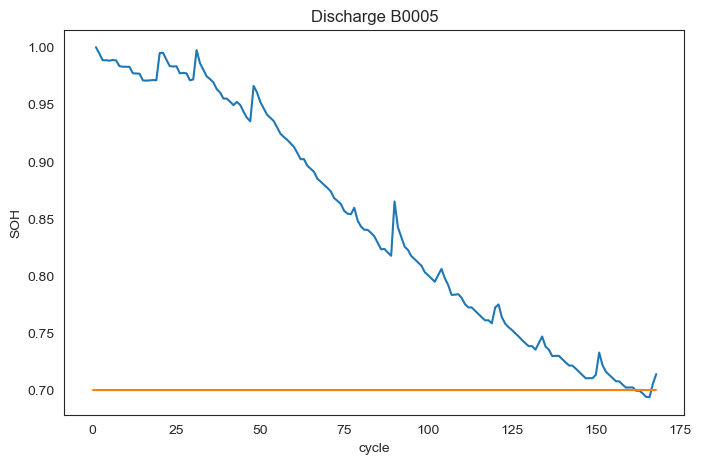

In [8]:
plot_df = dis_ele.loc[(dis_ele['cycle']>=1),['cycle','SoH']]
sns.set_style("white")
plt.figure(figsize=(8, 5))
plt.plot(plot_df['cycle'], plot_df['SoH'])
#Draw threshold
plt.plot([0.,len(capacity)], [0.70, 0.70])
plt.ylabel('SOH')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

# Training phase for calculating SoH
The dataset is prepared in such a way that it can be used by Tensorflow in the training phase, for this, two structures are created corresponding to the input and output expected to be obtained. For the input data, the relevant characteristics of the dataset are filtered, which are:

* Battery capacity
* Voltage
* Current
* Temperature
* Charging voltage
* Charging current
* Instant of time (from the start of the download)

For the output data, the SoH of the battery is calculated and in both input and output cases, the values are normalized to a range of values between [0-1].

In [9]:
C = dataset['capacity'][0]
soh = []
for i in range(len(dataset)):
  soh.append([dataset['capacity'][i] / C])
soh = pd.DataFrame(data=soh, columns=['SoH'])

attribs=['capacity', 'voltage_measured', 'current_measured',
         'temperature_measured', 'current_load', 'voltage_load', 'time']
train_dataset = dataset[attribs]
sc = MinMaxScaler(feature_range=(0,1))
train_dataset = sc.fit_transform(train_dataset)
print(train_dataset.shape)
print(soh.shape)

(50285, 7)
(50285, 1)


Preparation of the model, 3 dense layers are used, and the parameters are used as they are in the paper: 3 dense layers and one dropout, and one of the ADAM type is used as optimizer

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

In [11]:
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=train_dataset.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(1))
model.summary()
model.compile(optimizer=Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss='mean_absolute_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


## The model is trained, 50 epochs are used for training

In [12]:
model.fit(x=train_dataset, y=soh.to_numpy(), batch_size=25, epochs=10)

Epoch 1/10
2012/2012 [==============================] - 8s 3ms/step - loss: 0.0818
Epoch 2/10
2012/2012 [==============================] - 6s 3ms/step - loss: 0.0259
Epoch 3/10
2012/2012 [==============================] - 6s 3ms/step - loss: 0.0254
Epoch 4/10
2012/2012 [==============================] - 7s 3ms/step - loss: 0.0252
Epoch 5/10
2012/2012 [==============================] - 6s 3ms/step - loss: 0.0250
Epoch 6/10
2012/2012 [==============================] - 6s 3ms/step - loss: 0.0247
Epoch 7/10
2012/2012 [==============================] - 6s 3ms/step - loss: 0.0248
Epoch 8/10
2012/2012 [==============================] - 6s 3ms/step - loss: 0.0249
Epoch 9/10
2012/2012 [==============================] - 7s 3ms/step - loss: 0.0247
Epoch 10/10
2012/2012 [==============================] - 6s 3ms/step - loss: 0.0245


# Testing to test the SoH prediction model
To test the correctness of the model, the information of the same battery is loaded (B0006)

In [13]:
dataset_val, capacity_val = load_data('B0006')
attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity_val[attrib]
C = dis_ele['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele['SoH']=(dis_ele['capacity']) / C
print(dataset_val.head(5))
print(dis_ele.head(5))

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 2.035337591005598, 4.179799607333447, -0.0023663271409738672, 24.277567510331888, -0.0006, 0.0, 0.0]
   cycle  ambient_temperature            datetime  capacity  voltage_measured  \
0      1                   24 2008-04-02 15:25:41  2.035338          4.179800   
1      1                   24 2008-04-02 15:25:41  2.035338          4.179823   
2      1                   24 2008-04-02 15:25:41  2.035338          3.966528   
3      1                   24 2008-04-02 15:25:41  2.035338          3.945886   
4      1                   24 2008-04-02 15:25:41  2.035338          3.930354   

   current_measured  temperature_measured  current_load  voltage_load    time  
0         -0.002366             24.277568       -0.0006         0.000   0.000  
1          0.000434             24.277073       -0.0006         4.195  16.781  
2         -2.014242             24.366226       -1.9990         3.070  35.703  
3         -2.

A table is created containing the real SoH and the SoH predicted by the network and the root of the mean square error is calculated.

In [14]:
attrib=['capacity', 'voltage_measured', 'current_measured',
        'temperature_measured', 'current_load', 'voltage_load', 'time']
soh_pred = model.predict(sc.fit_transform(dataset_val[attrib]))
print(soh_pred.shape)

C = dataset_val['capacity'][0]
soh = []
for i in range(len(dataset_val)):
  soh.append(dataset_val['capacity'][i] / C)
new_soh = dataset_val.loc[(dataset_val['cycle'] >= 1), ['cycle']]
new_soh['SoH'] =  soh
new_soh['NewSoH'] = soh_pred
new_soh = new_soh.groupby(['cycle']).mean().reset_index()
print(new_soh.head(10))
rms = np.sqrt(mean_squared_error(new_soh['SoH'], new_soh['NewSoH']))
print('Root Mean Square Error: ', rms)

1572/1572 [==============================] - 2s 1ms/step
(50285, 1)
   cycle       SoH    NewSoH
0      1  1.000000  0.988059
1      2  0.994990  0.984806
2      3  0.989185  0.980880
3      4  0.989165  0.980820
4      5  0.982898  0.976456
5      6  0.989467  0.980992
6      7  0.989075  0.980757
7      8  0.967304  0.965937
8      9  0.966997  0.965691
9     10  0.961625  0.961953
Root Mean Square Error:  0.07960843856272379


Finally both SoH are plotted to observe their differences

Text(0.5, 1.0, 'Discharge B0006')

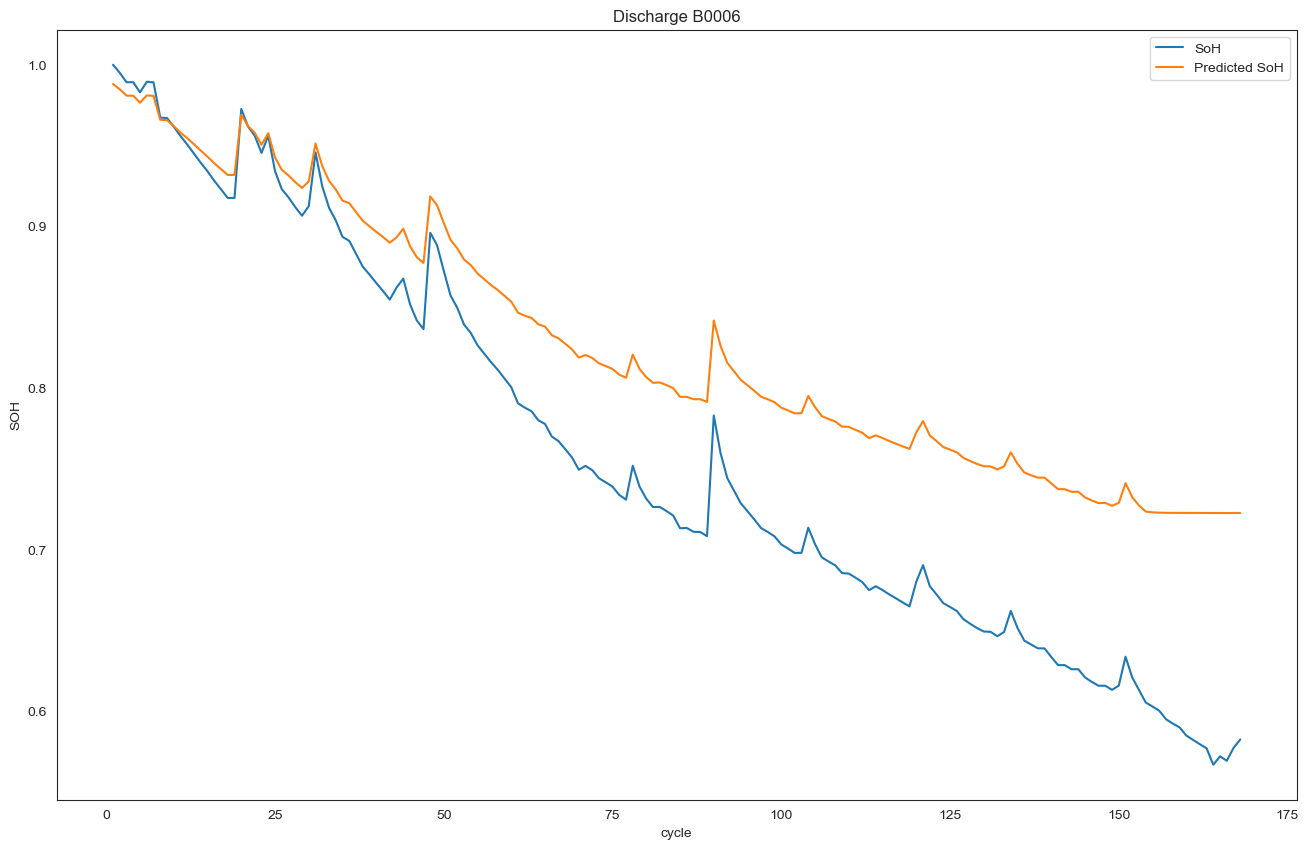

In [15]:
plot_df = new_soh.loc[(new_soh['cycle']>=1),['cycle','SoH', 'NewSoH']]
sns.set_style("white")
plt.figure(figsize=(16, 10))
plt.plot(plot_df['cycle'], plot_df['SoH'], label='SoH')
plt.plot(plot_df['cycle'], plot_df['NewSoH'], label='Predicted SoH')
#Draw threshold
#plt.plot([0.,len(capacity)], [0.70, 0.70], label='Threshold')
plt.ylabel('SOH')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.legend()
plt.title('Discharge B0006')

For the estimation of SoH, it can be seen that the data pattern is learned by the model correctly, as predicted by the theory, since the shape of the curves is almost identical. The SoH shown has the same behavior as expected in theory, which is corroborated with the root mean square error value of the graph in illustration 8, whose value of 9% is very similar to that found previously. This reaffirms the precision when making the prediction.

# RUL estimation
In the same way that was done for the estimation of SoH, the training and testing dataset is prepared, in this particular case the battery capacity data is used using the first data of the first 50 cycles to predict the capacity in the following cycles in such a way as to be able to know when the threshold of the battery is reached and estimate the remaining cycles to reach the End of Life of the battery

In [17]:
dataset_val, capacity_val = load_data('B0005')
attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity_val[attrib]
rows=['cycle','capacity']
dataset=dis_ele[rows]
data_train=dataset[(dataset['cycle']<50)]
data_set_train=data_train.iloc[:,1:2].values
data_test=dataset[(dataset['cycle']>=50)]
data_set_test=data_test.iloc[:,1:2].values

sc=MinMaxScaler(feature_range=(0,1))
data_set_train=sc.fit_transform(data_set_train)
data_set_test=sc.transform(data_set_test)

X_train=[]
y_train=[]
#take the last 10t to predict 10t+1
for i in range(10,49):
    X_train.append(data_set_train[i-10:i,0])
    y_train.append(data_set_train[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]


In this section the model is trained, based on the proposal of [2] and making use of LSTM-type networks instead of standard neural networks.

In [18]:
regress = Sequential()
regress.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1],1)))
regress.add(Dropout(0.3))
regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))
regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))
regress.add(LSTM(units=200))
regress.add(Dropout(0.3))
regress.add(Dense(units=1))
regress.compile(optimizer='adam',loss='mean_squared_error')
regress.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 200)           161600    
                                                                 
 dropout_1 (Dropout)         (None, 10, 200)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 200)           320800    
                                                                 
 dropout_2 (Dropout)         (None, 10, 200)           0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 200)           320800    
                                                                 
 dropout_3 (Dropout)         (None, 10, 200)           0         
                                                                 
 lstm_3 (LSTM)               (None, 200)              

In [ ]:
regress.fit(X_train,y_train,epochs=200,batch_size=25)

In [19]:
print(len(data_test))
data_total=pd.concat((data_train['capacity'], data_test['capacity']),axis=0)
inputs=data_total[len(data_total)-len(data_test)-10:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

119


In [20]:
X_test=[]
for i in range(10,129):
    X_test.append(inputs[i-10:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred=regress.predict(X_test)
print(pred.shape)
pred=sc.inverse_transform(pred)
pred=pred[:,0]
tests=data_test.iloc[:,1:2]
rmse = np.sqrt(mean_squared_error(tests, pred))
print('Test RMSE: %.3f' % rmse)
metrics.r2_score(tests,pred)

4/4 [==============================] - 7s 15ms/step
(119, 1)
Test RMSE: 0.293


-3.693337538672373

As can be seen, the mean RMSE is 0.05 (5%), which is very close to the values observed in the literature using this type of network.

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17744\1198164500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['pre']=pred


Text(0.5, 1.0, 'Discharge B0005 (prediction) start in cycle 50 -RULe=-8, window-size=10')

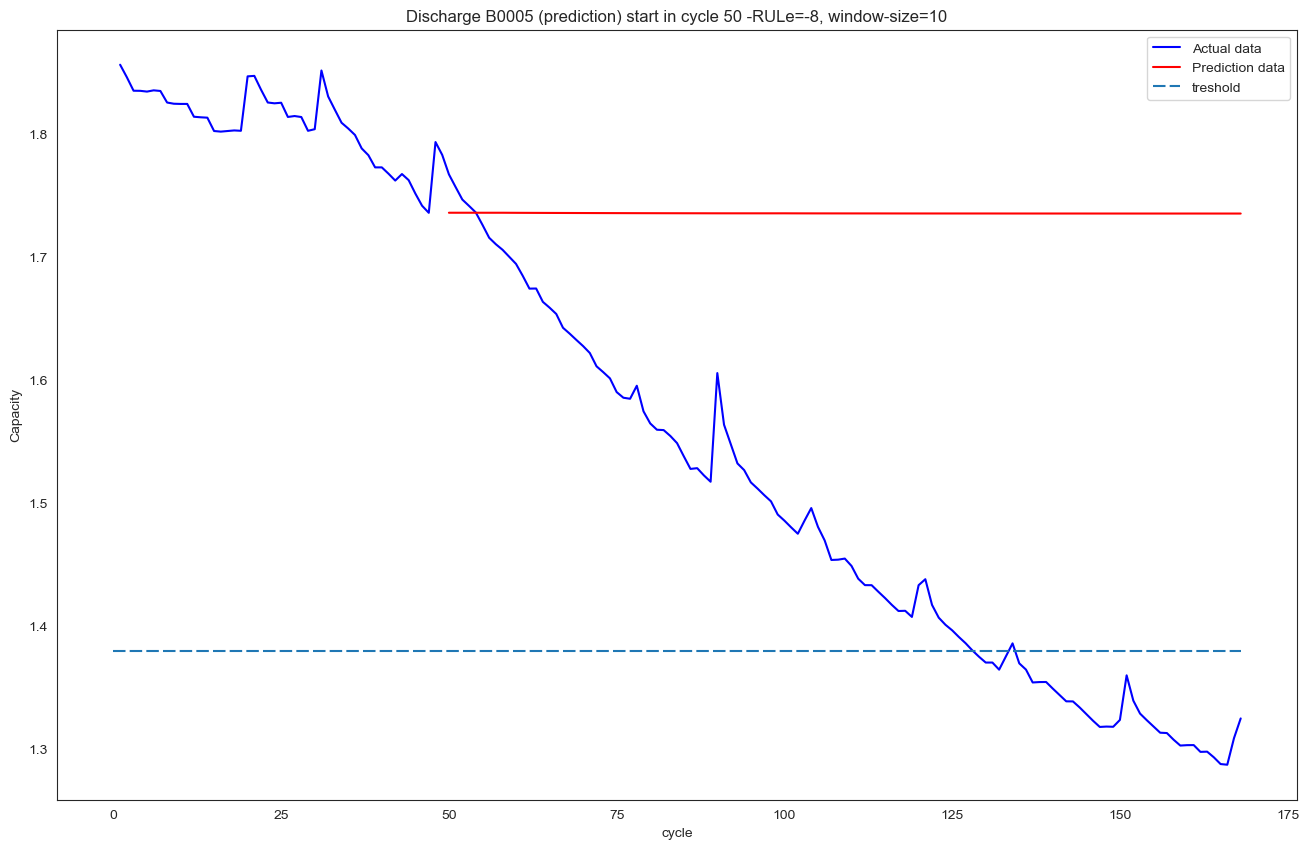

In [21]:
ln = len(data_train)
data_test['pre']=pred
plot_df = dataset.loc[(dataset['cycle']>=1),['cycle','capacity']]
plot_per = data_test.loc[(data_test['cycle']>=ln),['cycle','pre']]
plt.figure(figsize=(16, 10))
plt.plot(plot_df['cycle'], plot_df['capacity'], label="Actual data", color='blue')
plt.plot(plot_per['cycle'],plot_per['pre'],label="Prediction data", color='red')
#Draw threshold
plt.plot([0.,168], [1.38, 1.38],dashes=[6, 2], label="treshold")
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.legend()
plt.title('Discharge B0005 (prediction) start in cycle 50 -RULe=-8, window-size=10')

Finally, it can be seen in the graph that the capacity value and how it behaves over time is very close to the real value and supporting these data, the error in the estimation of the RUL was -8 which makes us understand that The model went ahead by 8 cycles to estimate that the battery reached its end of life.

In [22]:
pred=0
Afil=0
Pfil=0
a=data_test['capacity'].values
b=data_test['pre'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.38:
        j=i
        Afil=j
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 1.38:
        k=i
        Pfil=k
        break
print("The Actual fail at cycle number: "+ str(Afil+ln))
print("The prediction fail at cycle number: "+ str(Pfil+ln))
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")

The Actual fail at cycle number: 128
The prediction fail at cycle number: 49
The error of RUL= -79 Cycle(s)
